# Exploratory Analysis - IOM Displacement Tracking Matrix

In [90]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import choice
from shapely.geometry import Point
#import geopy
%matplotlib inline

In [7]:
d91 = pd.read_csv("data/iom_dtm_reports/csv/d91.csv")
r91 = pd.read_csv("data/iom_dtm_reports/csv/r91.csv")
df = gpd.GeoDataFrame()
dfr = gpd.GeoDataFrame()
dfd = gpd.GeoDataFrame()
pairs = [(Point(i.Longitude, i.Latitude), 'd') for i in d91.itertuples() ] \
            + [(Point(i.Longitude, i.Latitude), 'r') for i in r91.itertuples() ]
point = []
colour = []
for i, j in pairs:
    point.append(i), colour.append(j)
    
df['points'] = point
df['colour'] = colour
df = df.set_geometry('points')

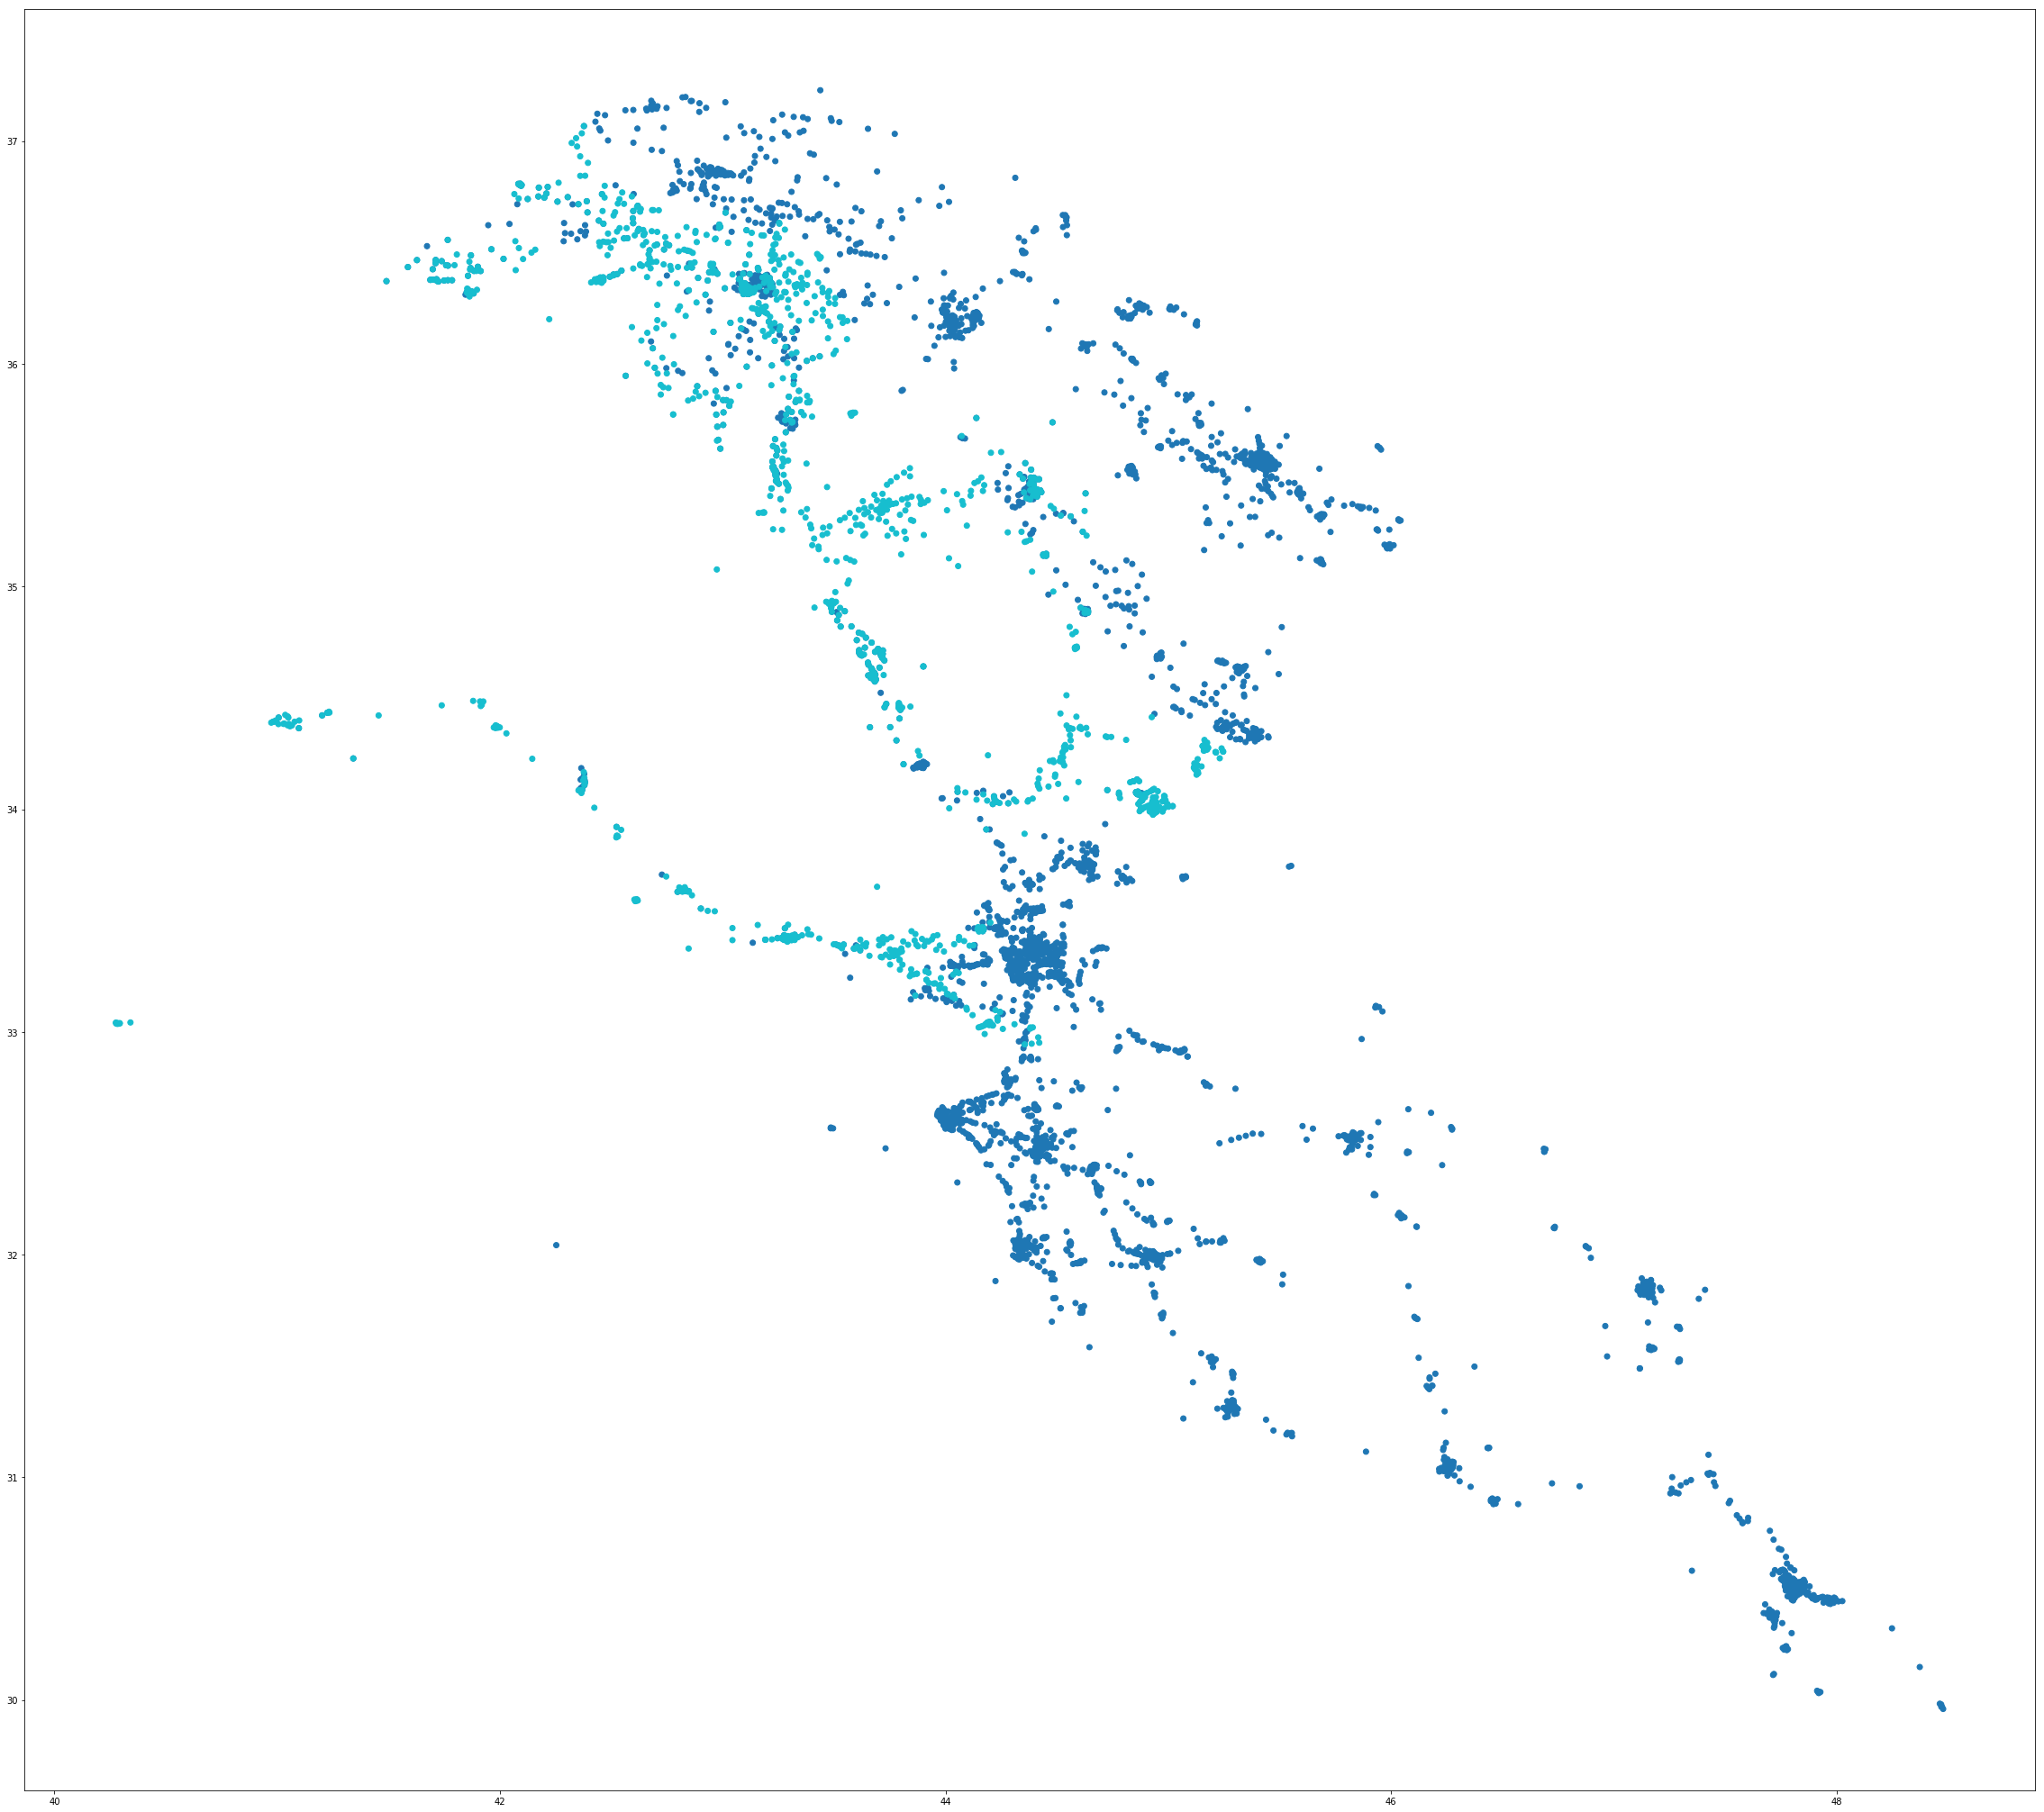

In [8]:
plt.rcParams["figure.figsize"] = (40,40)
df.plot(column='colour')

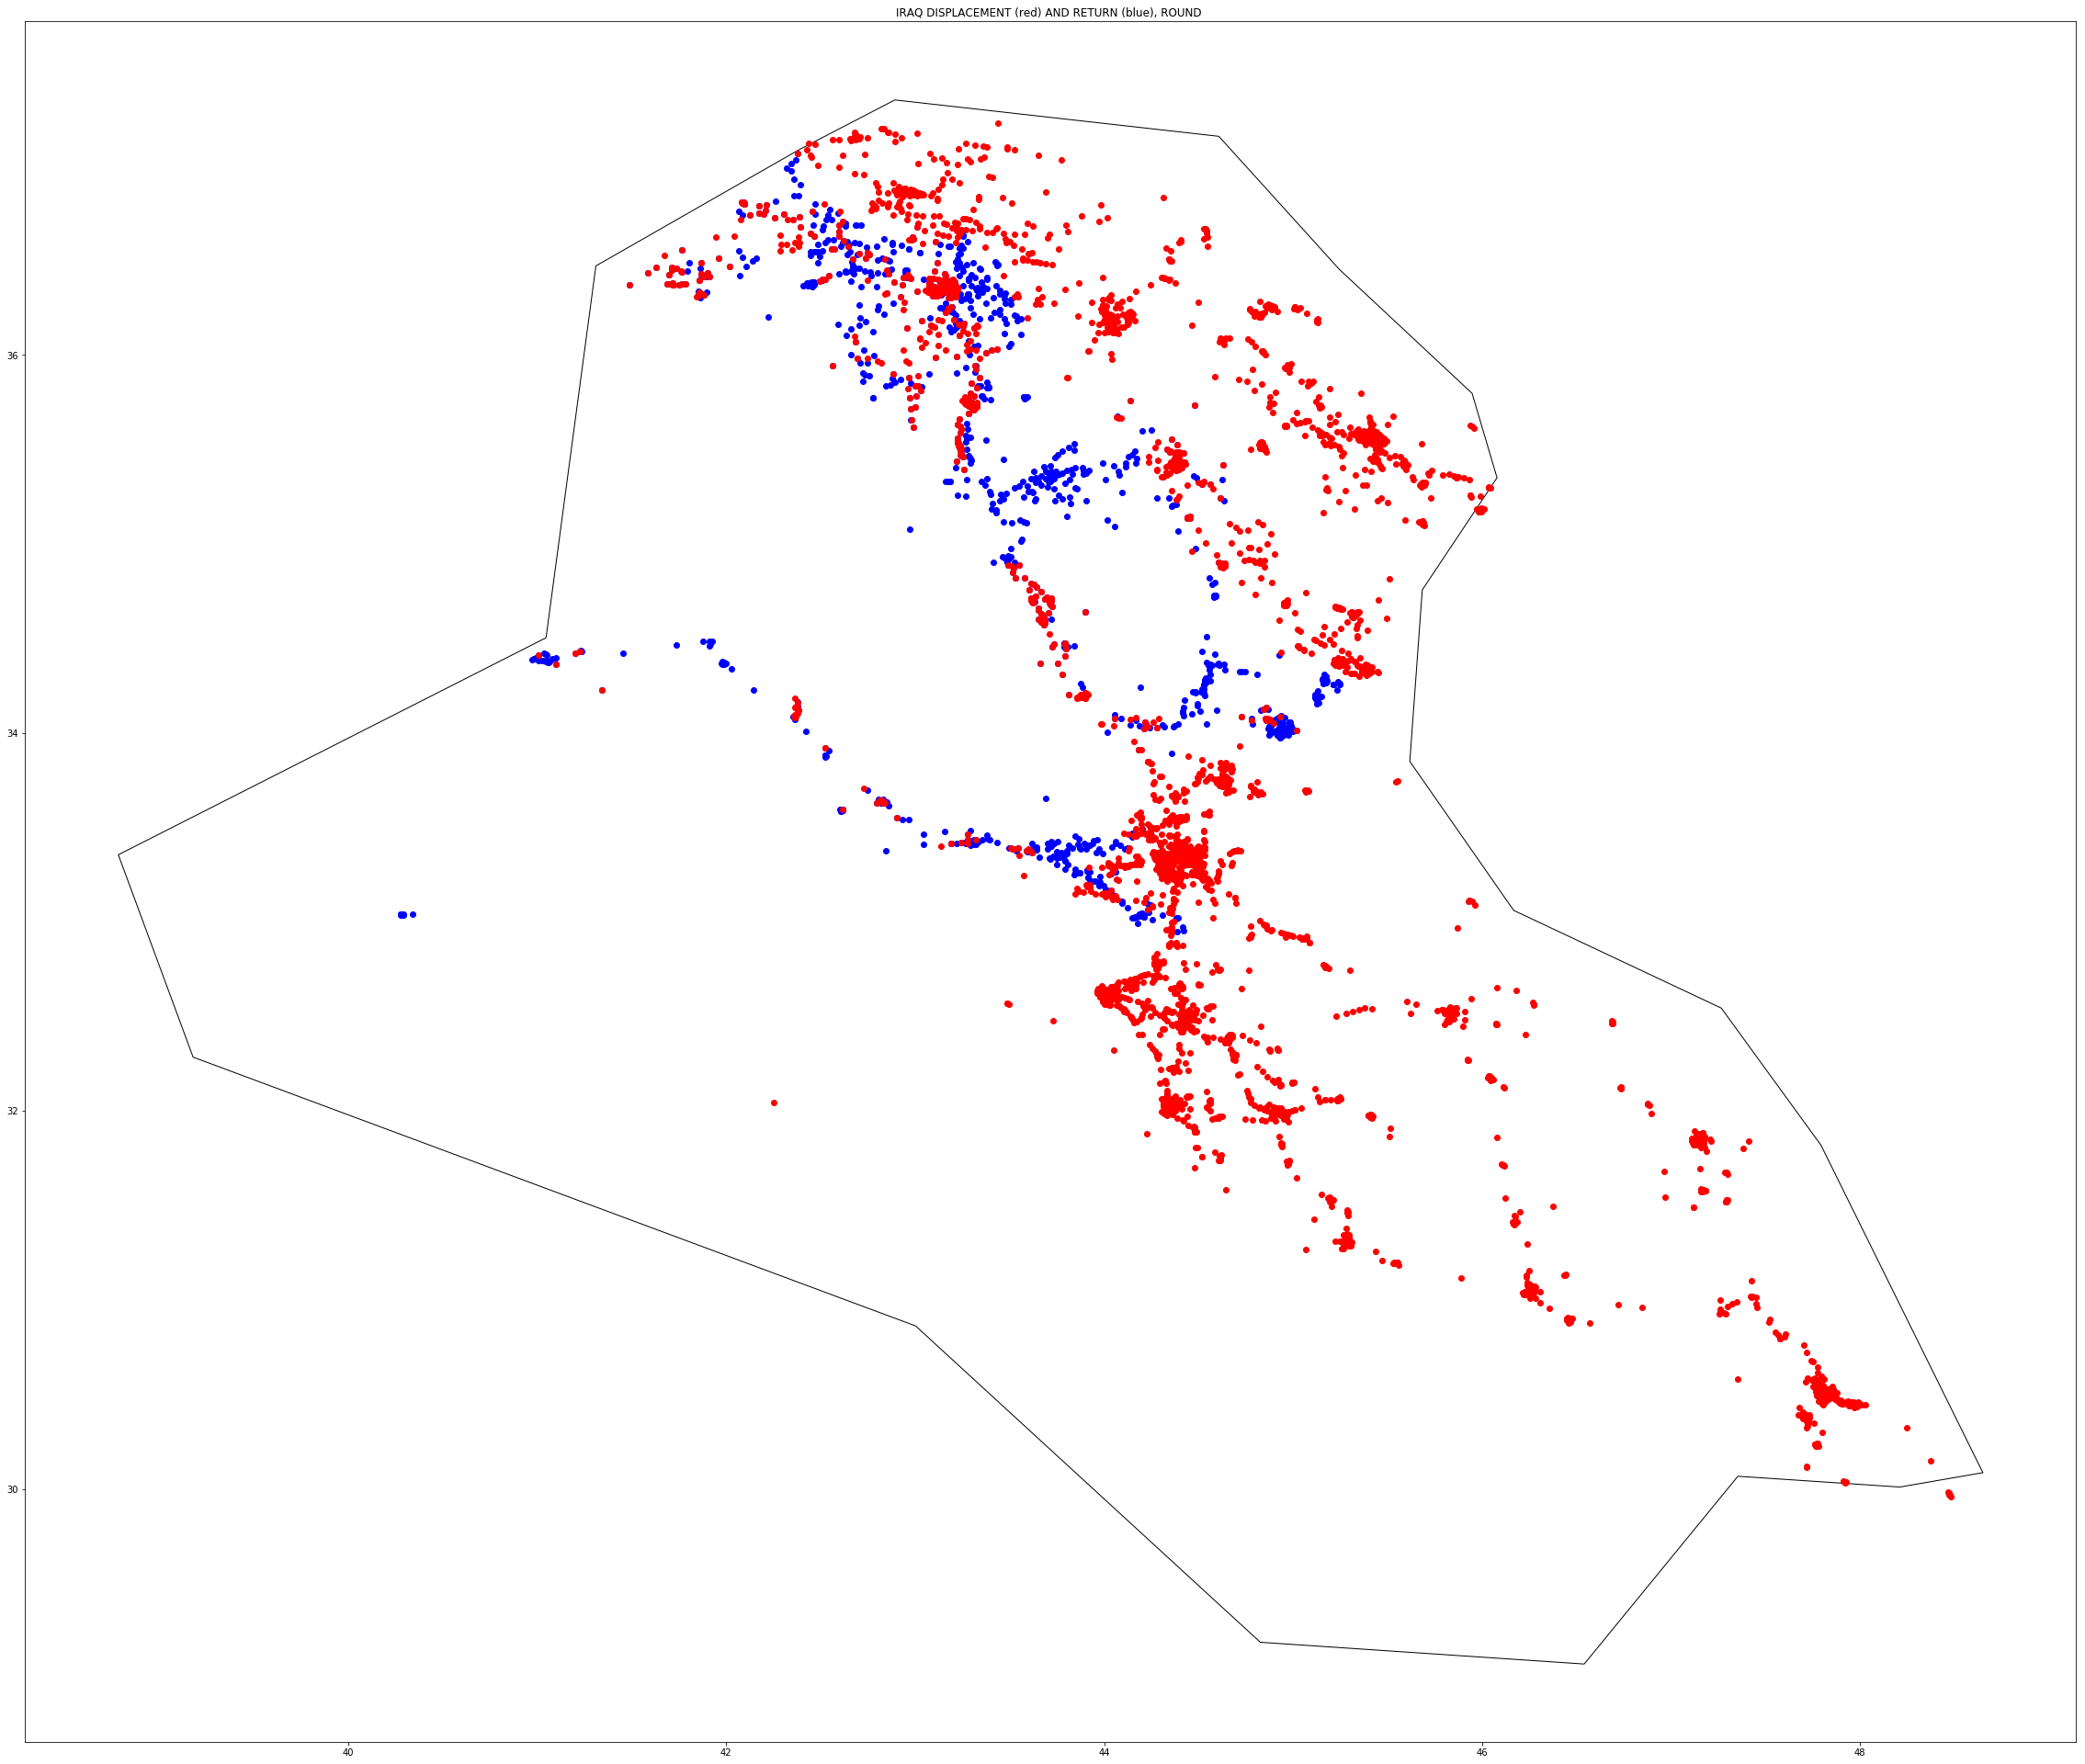

In [13]:
iraq = gpd.read_file('map.geojson')

rounds = range(1,91+1)


d = pd.read_csv("data/iom_dtm_reports/csv/d91.csv")
r = pd.read_csv("data/iom_dtm_reports/csv/r91.csv")
dfr = gpd.GeoDataFrame()
dfd = gpd.GeoDataFrame()


dfd['points'] =  [Point(i.Longitude, i.Latitude) for i in d.itertuples() ] 
dfr['points'] =  [Point(i.Longitude, i.Latitude) for i in r.itertuples() ]
dfr = dfr.set_geometry('points')
dfr.crs = iraq.crs
dfd = dfd.set_geometry('points')
dfd.crs = iraq.crs

plt.rcParams["figure.figsize"] = (40,40)
iq = iraq.plot(color='white', edgecolor='black')
dfr.plot(ax=iq, color='blue')
dfd.plot(ax=iq, color='red')
plt.title("IRAQ DISPLACEMENT (red) AND RETURN (blue), ROUND")
plt.show();

In [71]:
d91 = pd.read_csv("data/iom_dtm_reports/csv/d91.csv")
r91 = pd.read_csv("data/iom_dtm_reports/csv/r91.csv")

def plot_map(d91, r91, name):
    dfr = gpd.GeoDataFrame()
    dfd = gpd.GeoDataFrame()

    iraq = gpd.read_file('map.geojson')
    dfd['points'] =  [Point(i.Longitude, i.Latitude) for i in d91.itertuples() ] 
    dfr['points'] =  [Point(i.Longitude, i.Latitude) for i in r91.itertuples() ]
    dfr = dfr.set_geometry('points')
    dfd = dfd.set_geometry('points')
    iraq.to_crs = {'init' :'epsg:4467'}

    base = dfr.plot(color='red')
    dfd.plot(ax=base, marker='o', color='blue');
    plt.savefig(name + ".png")

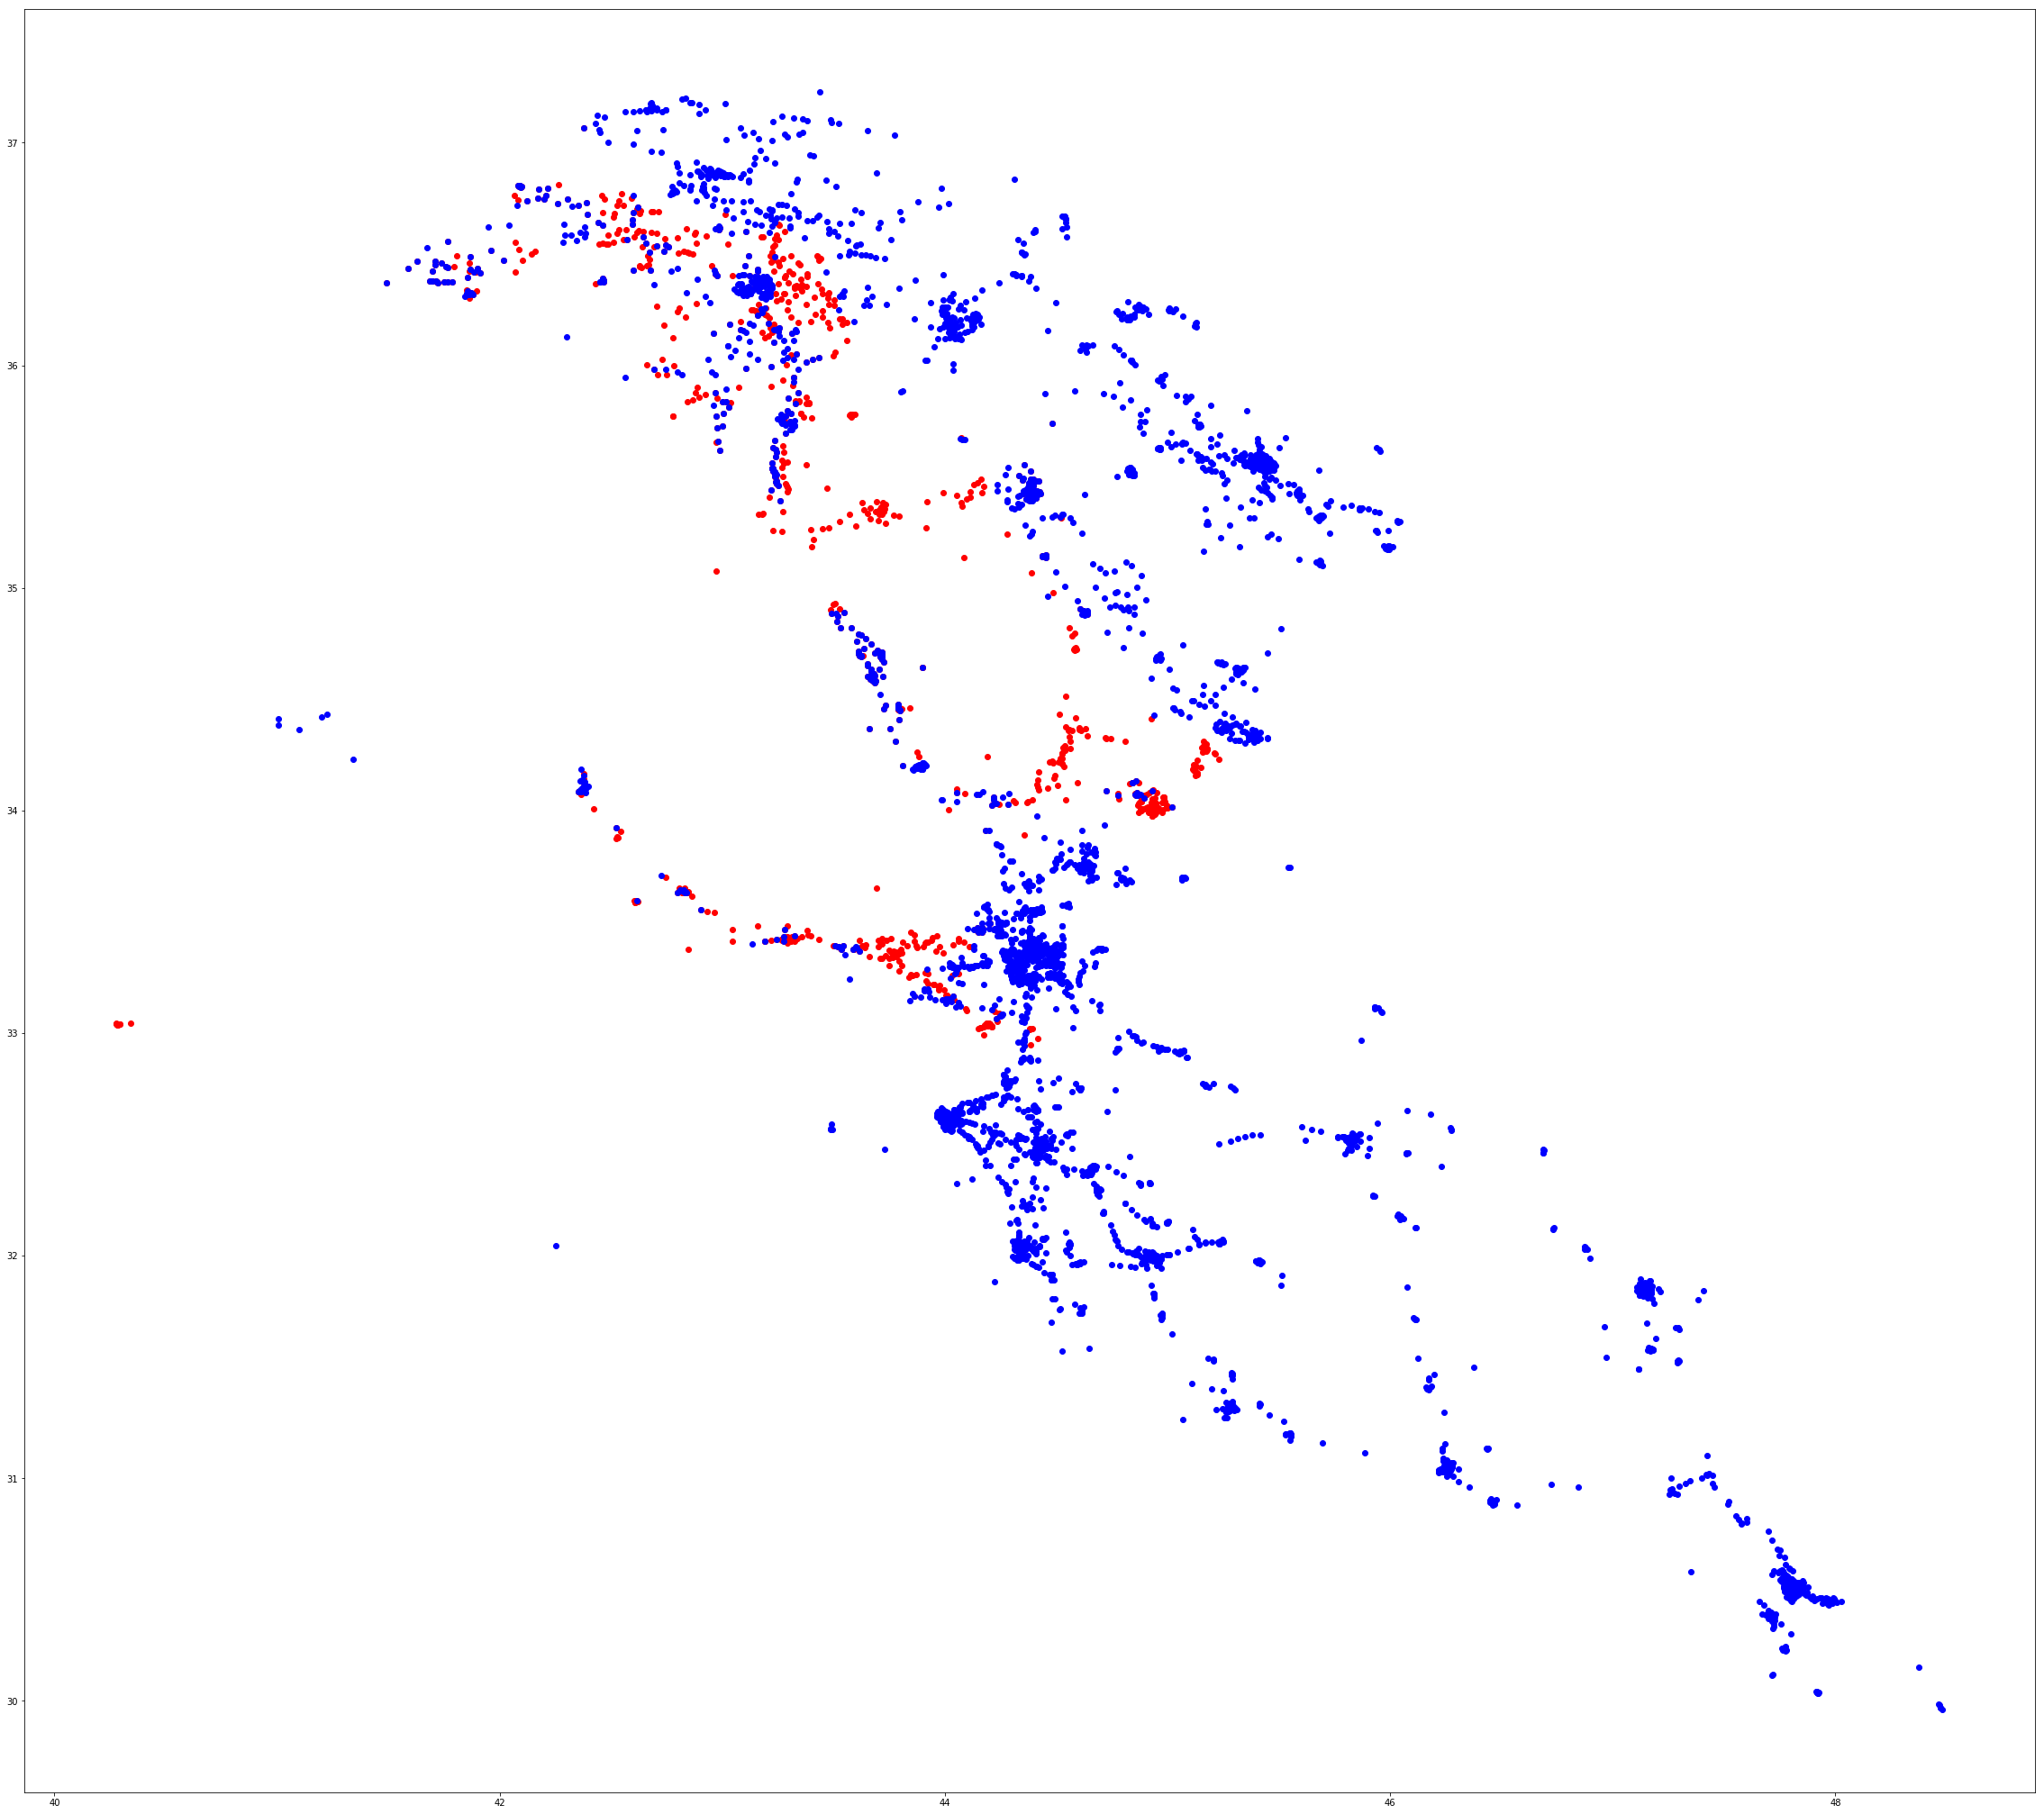

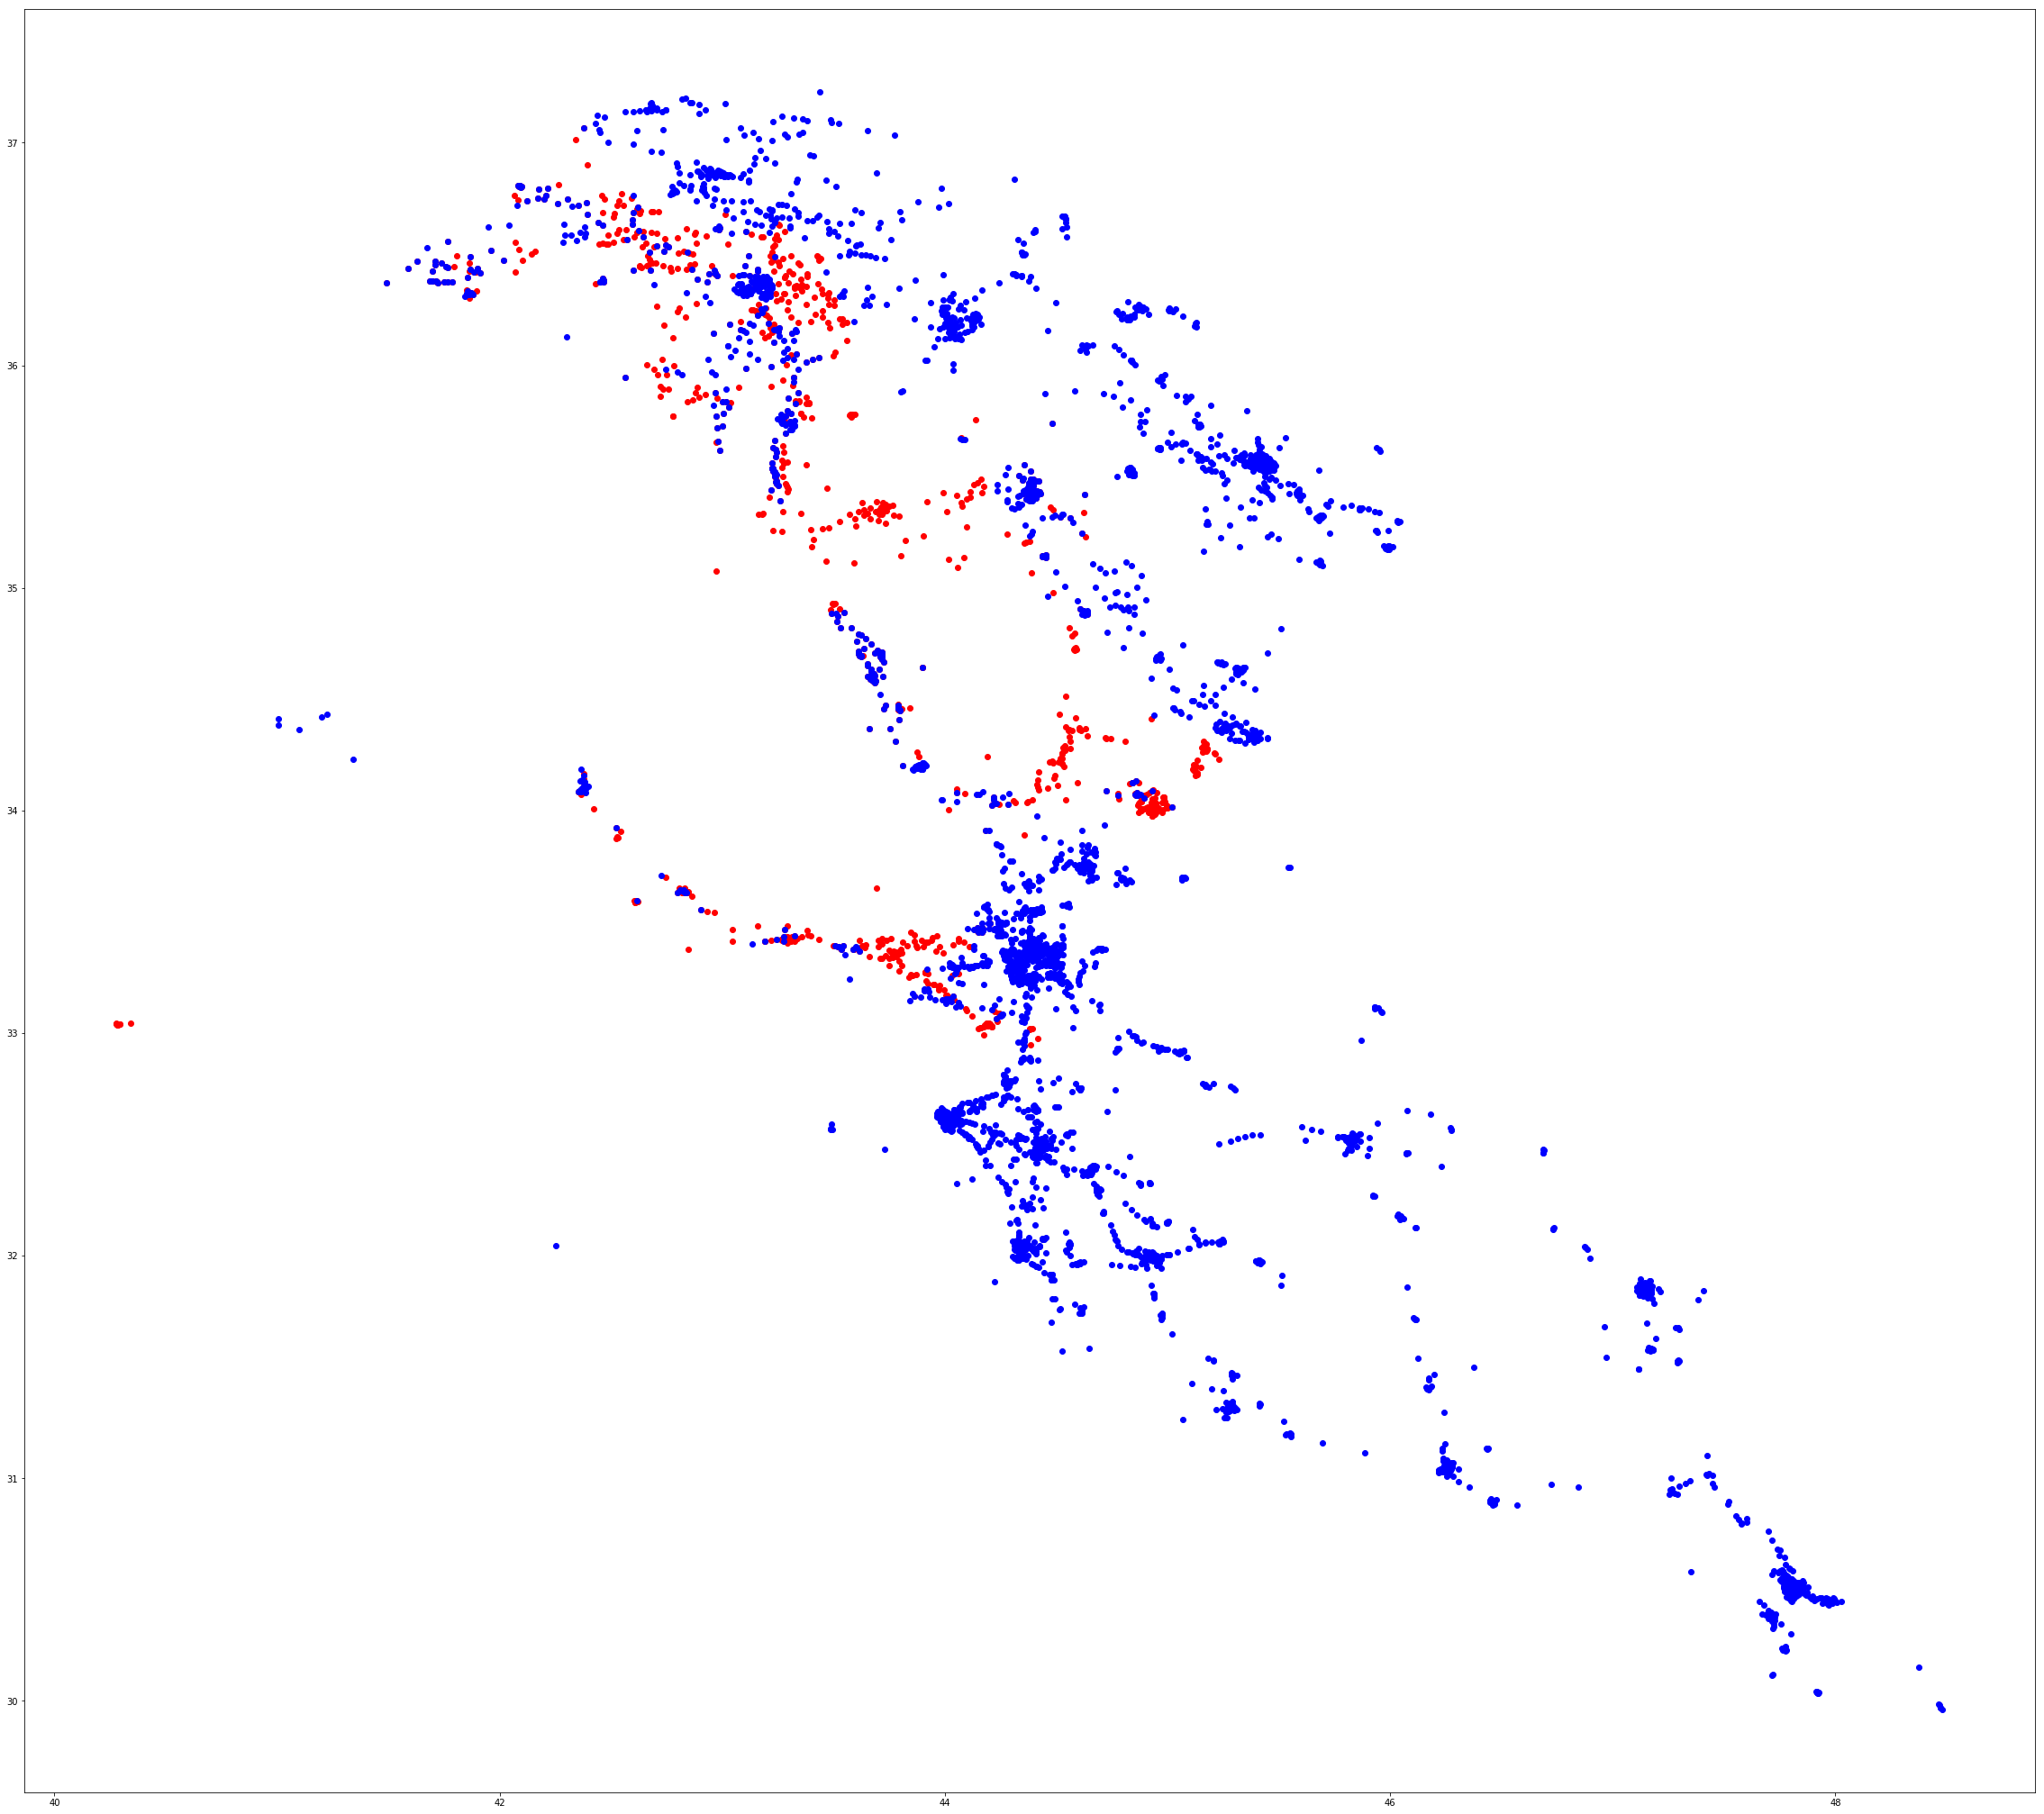

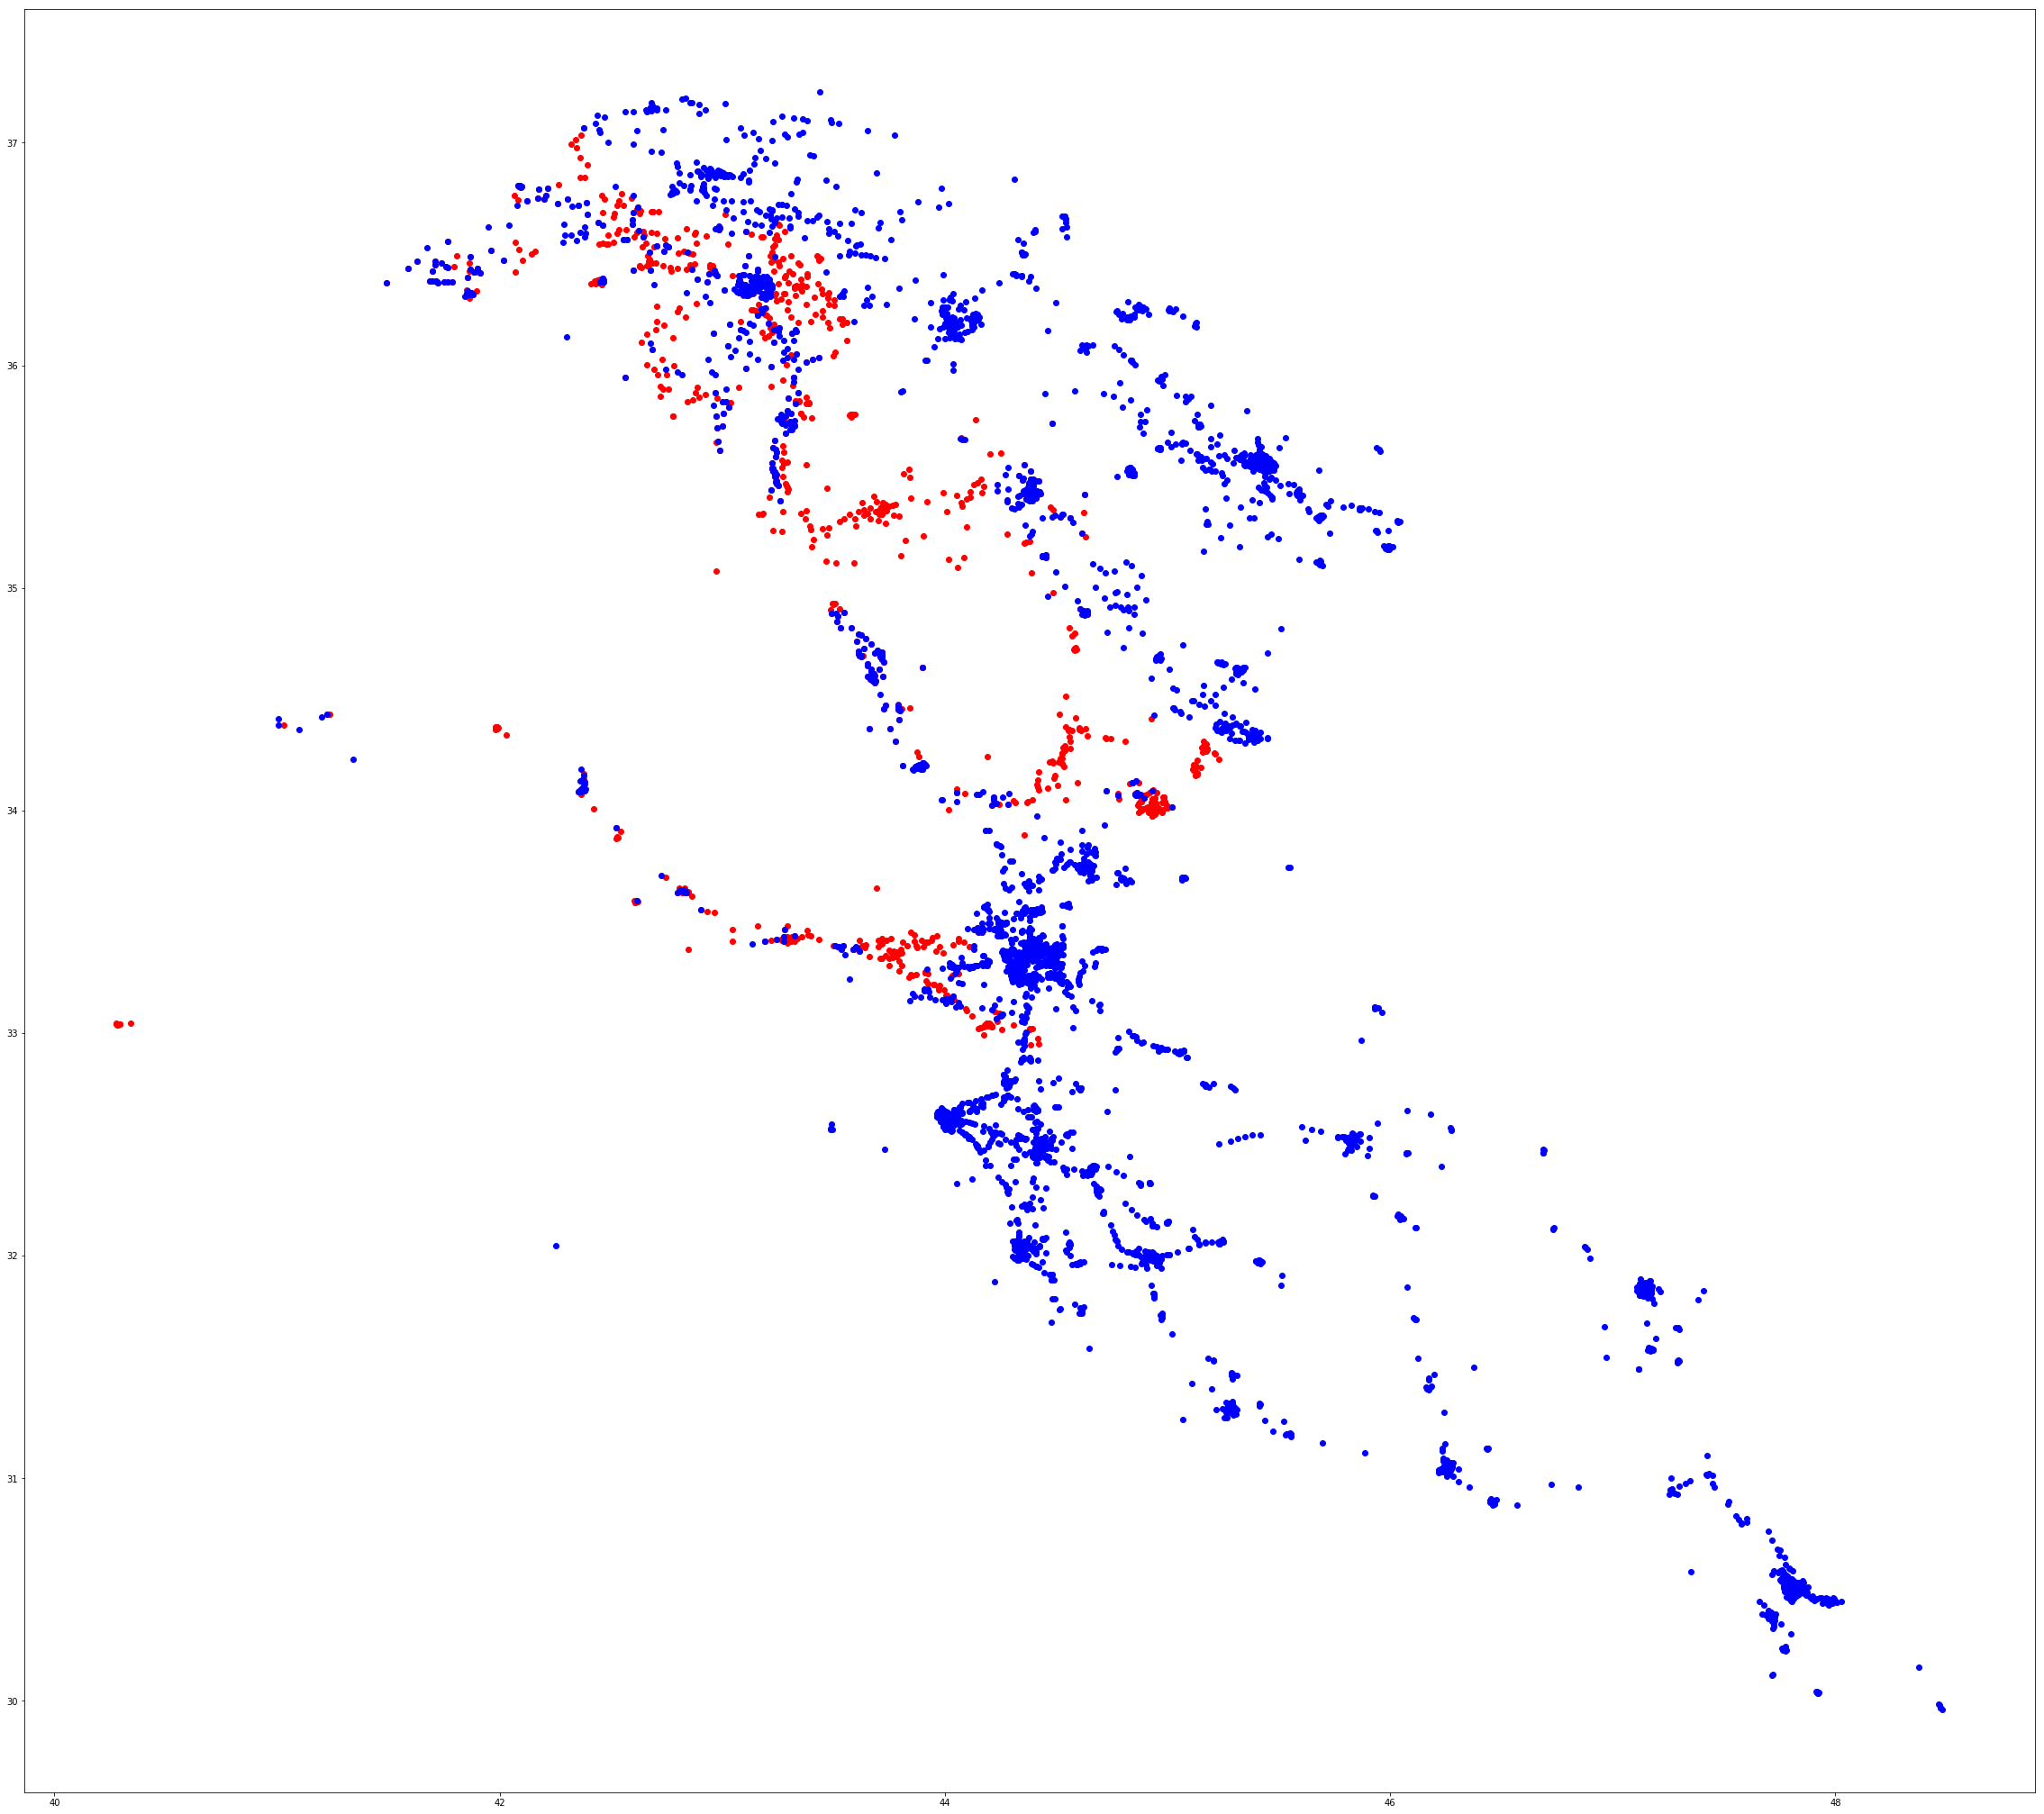

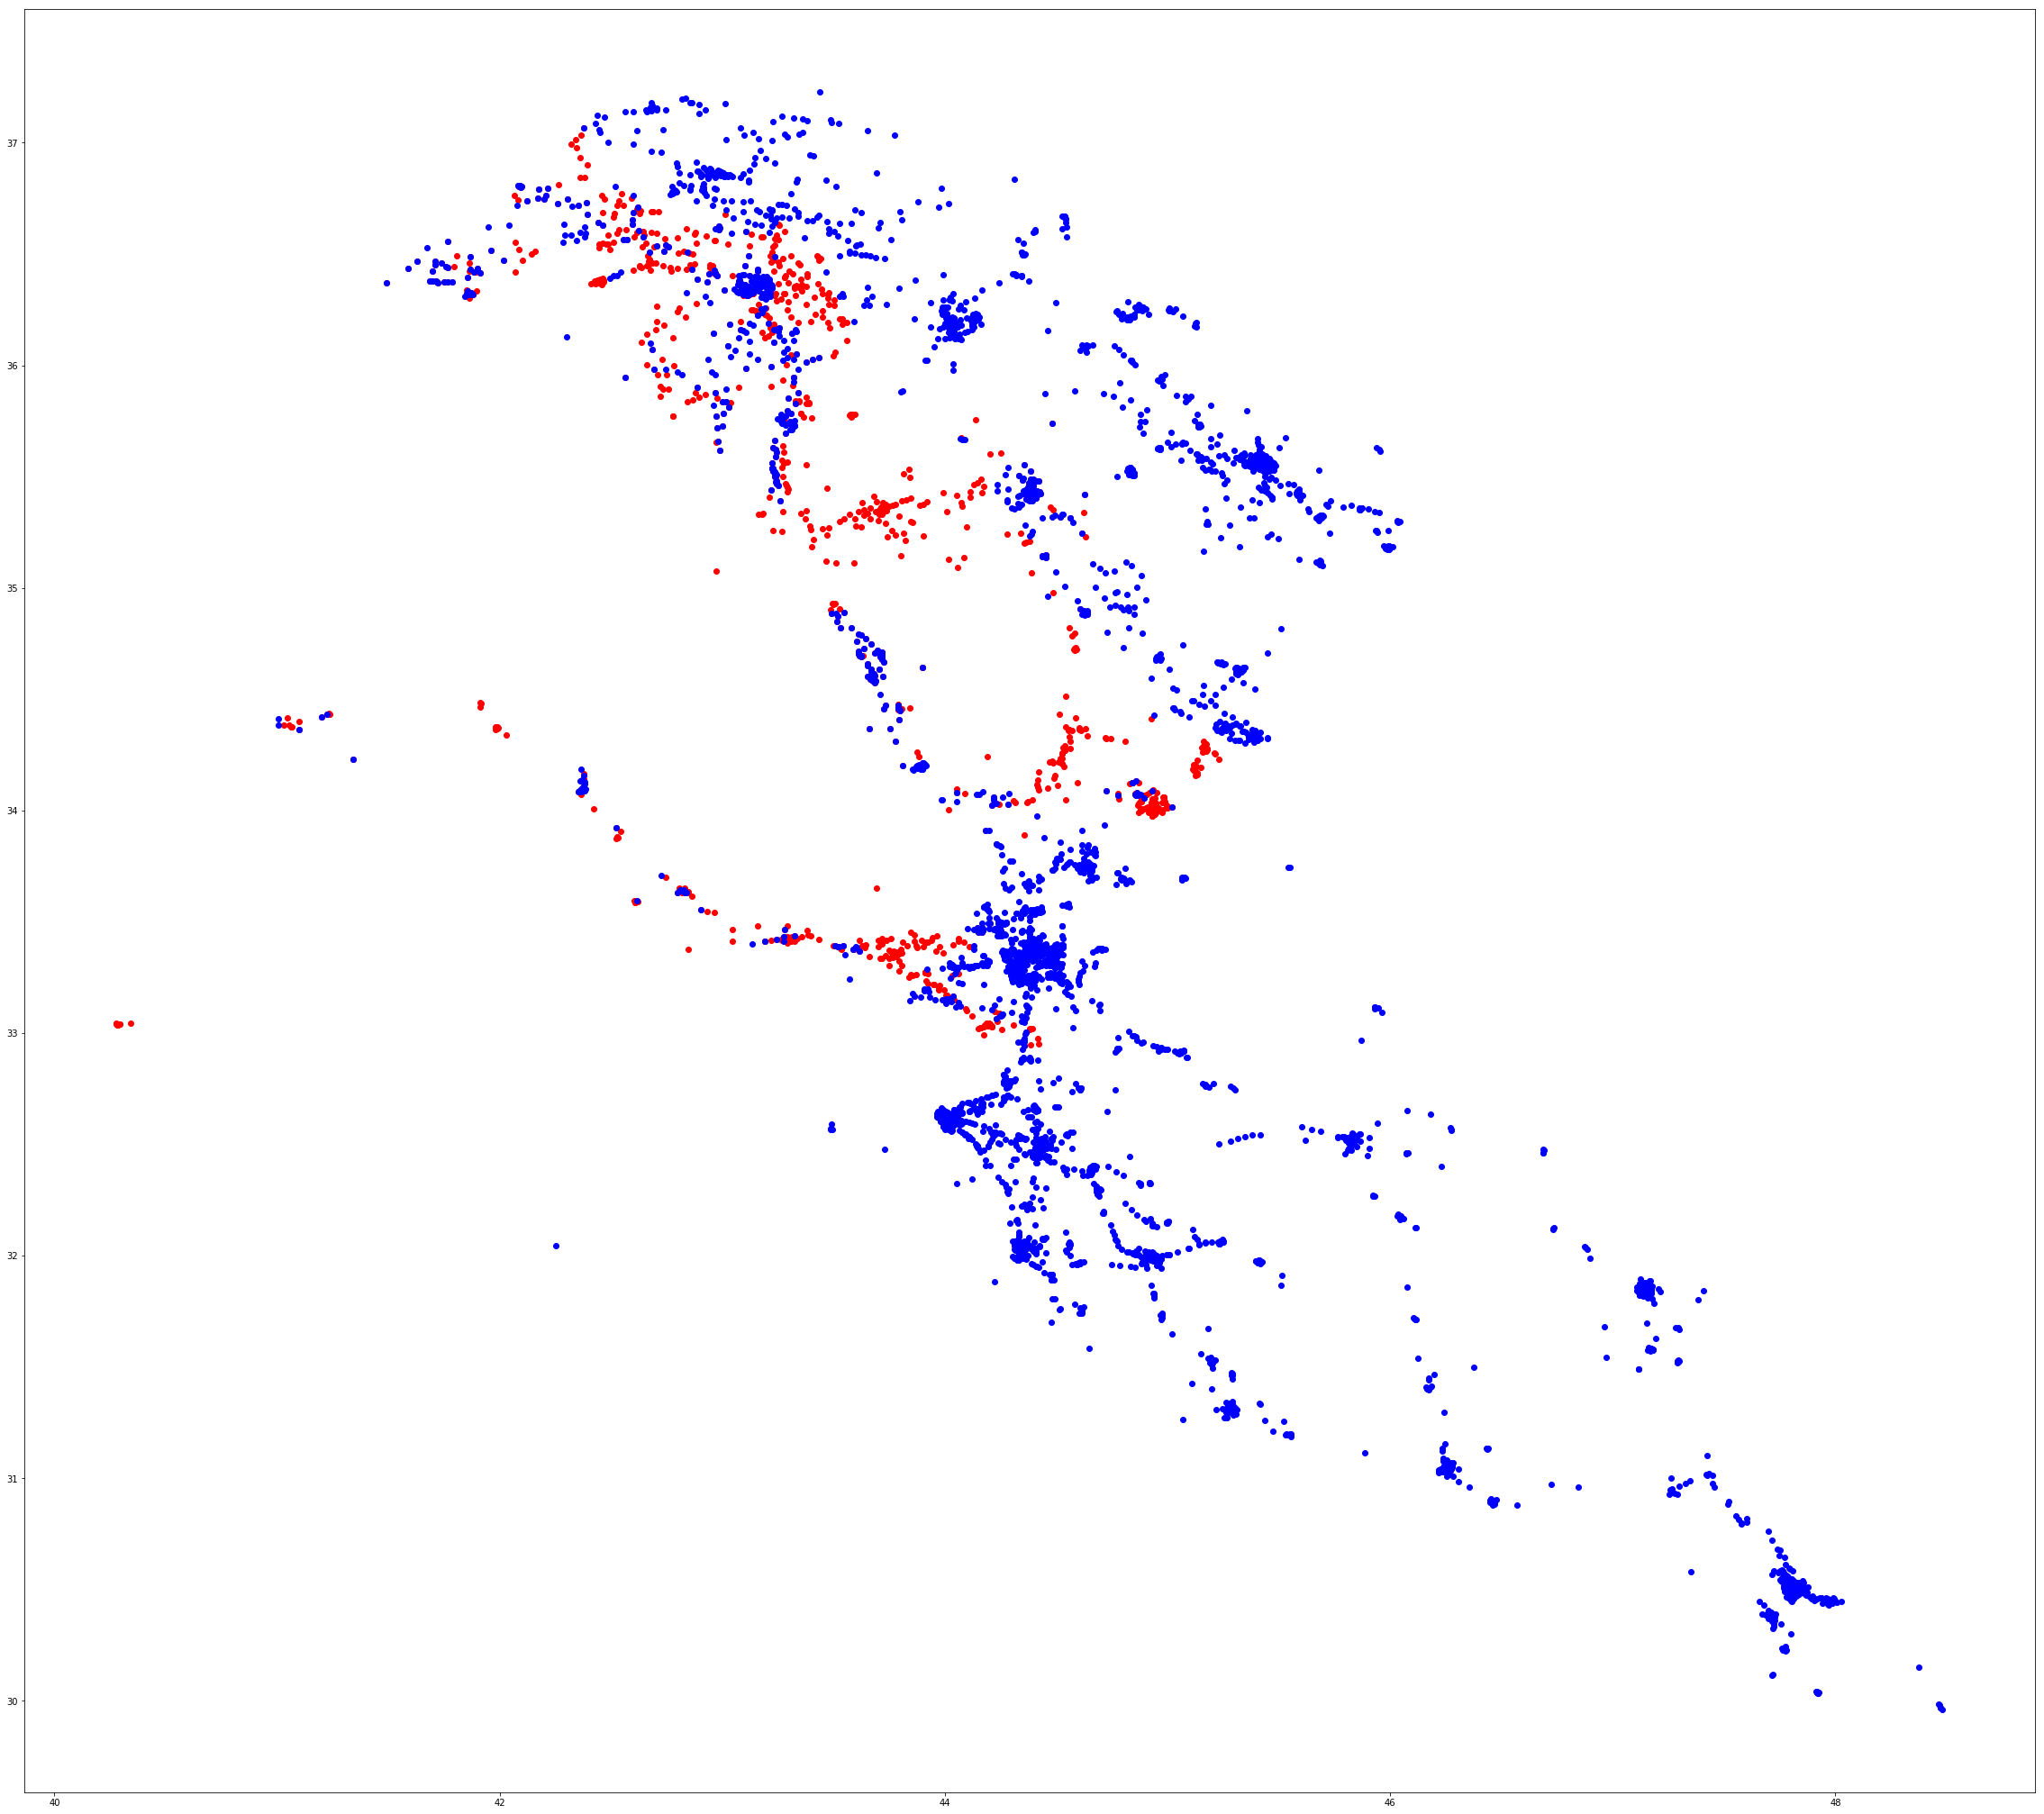

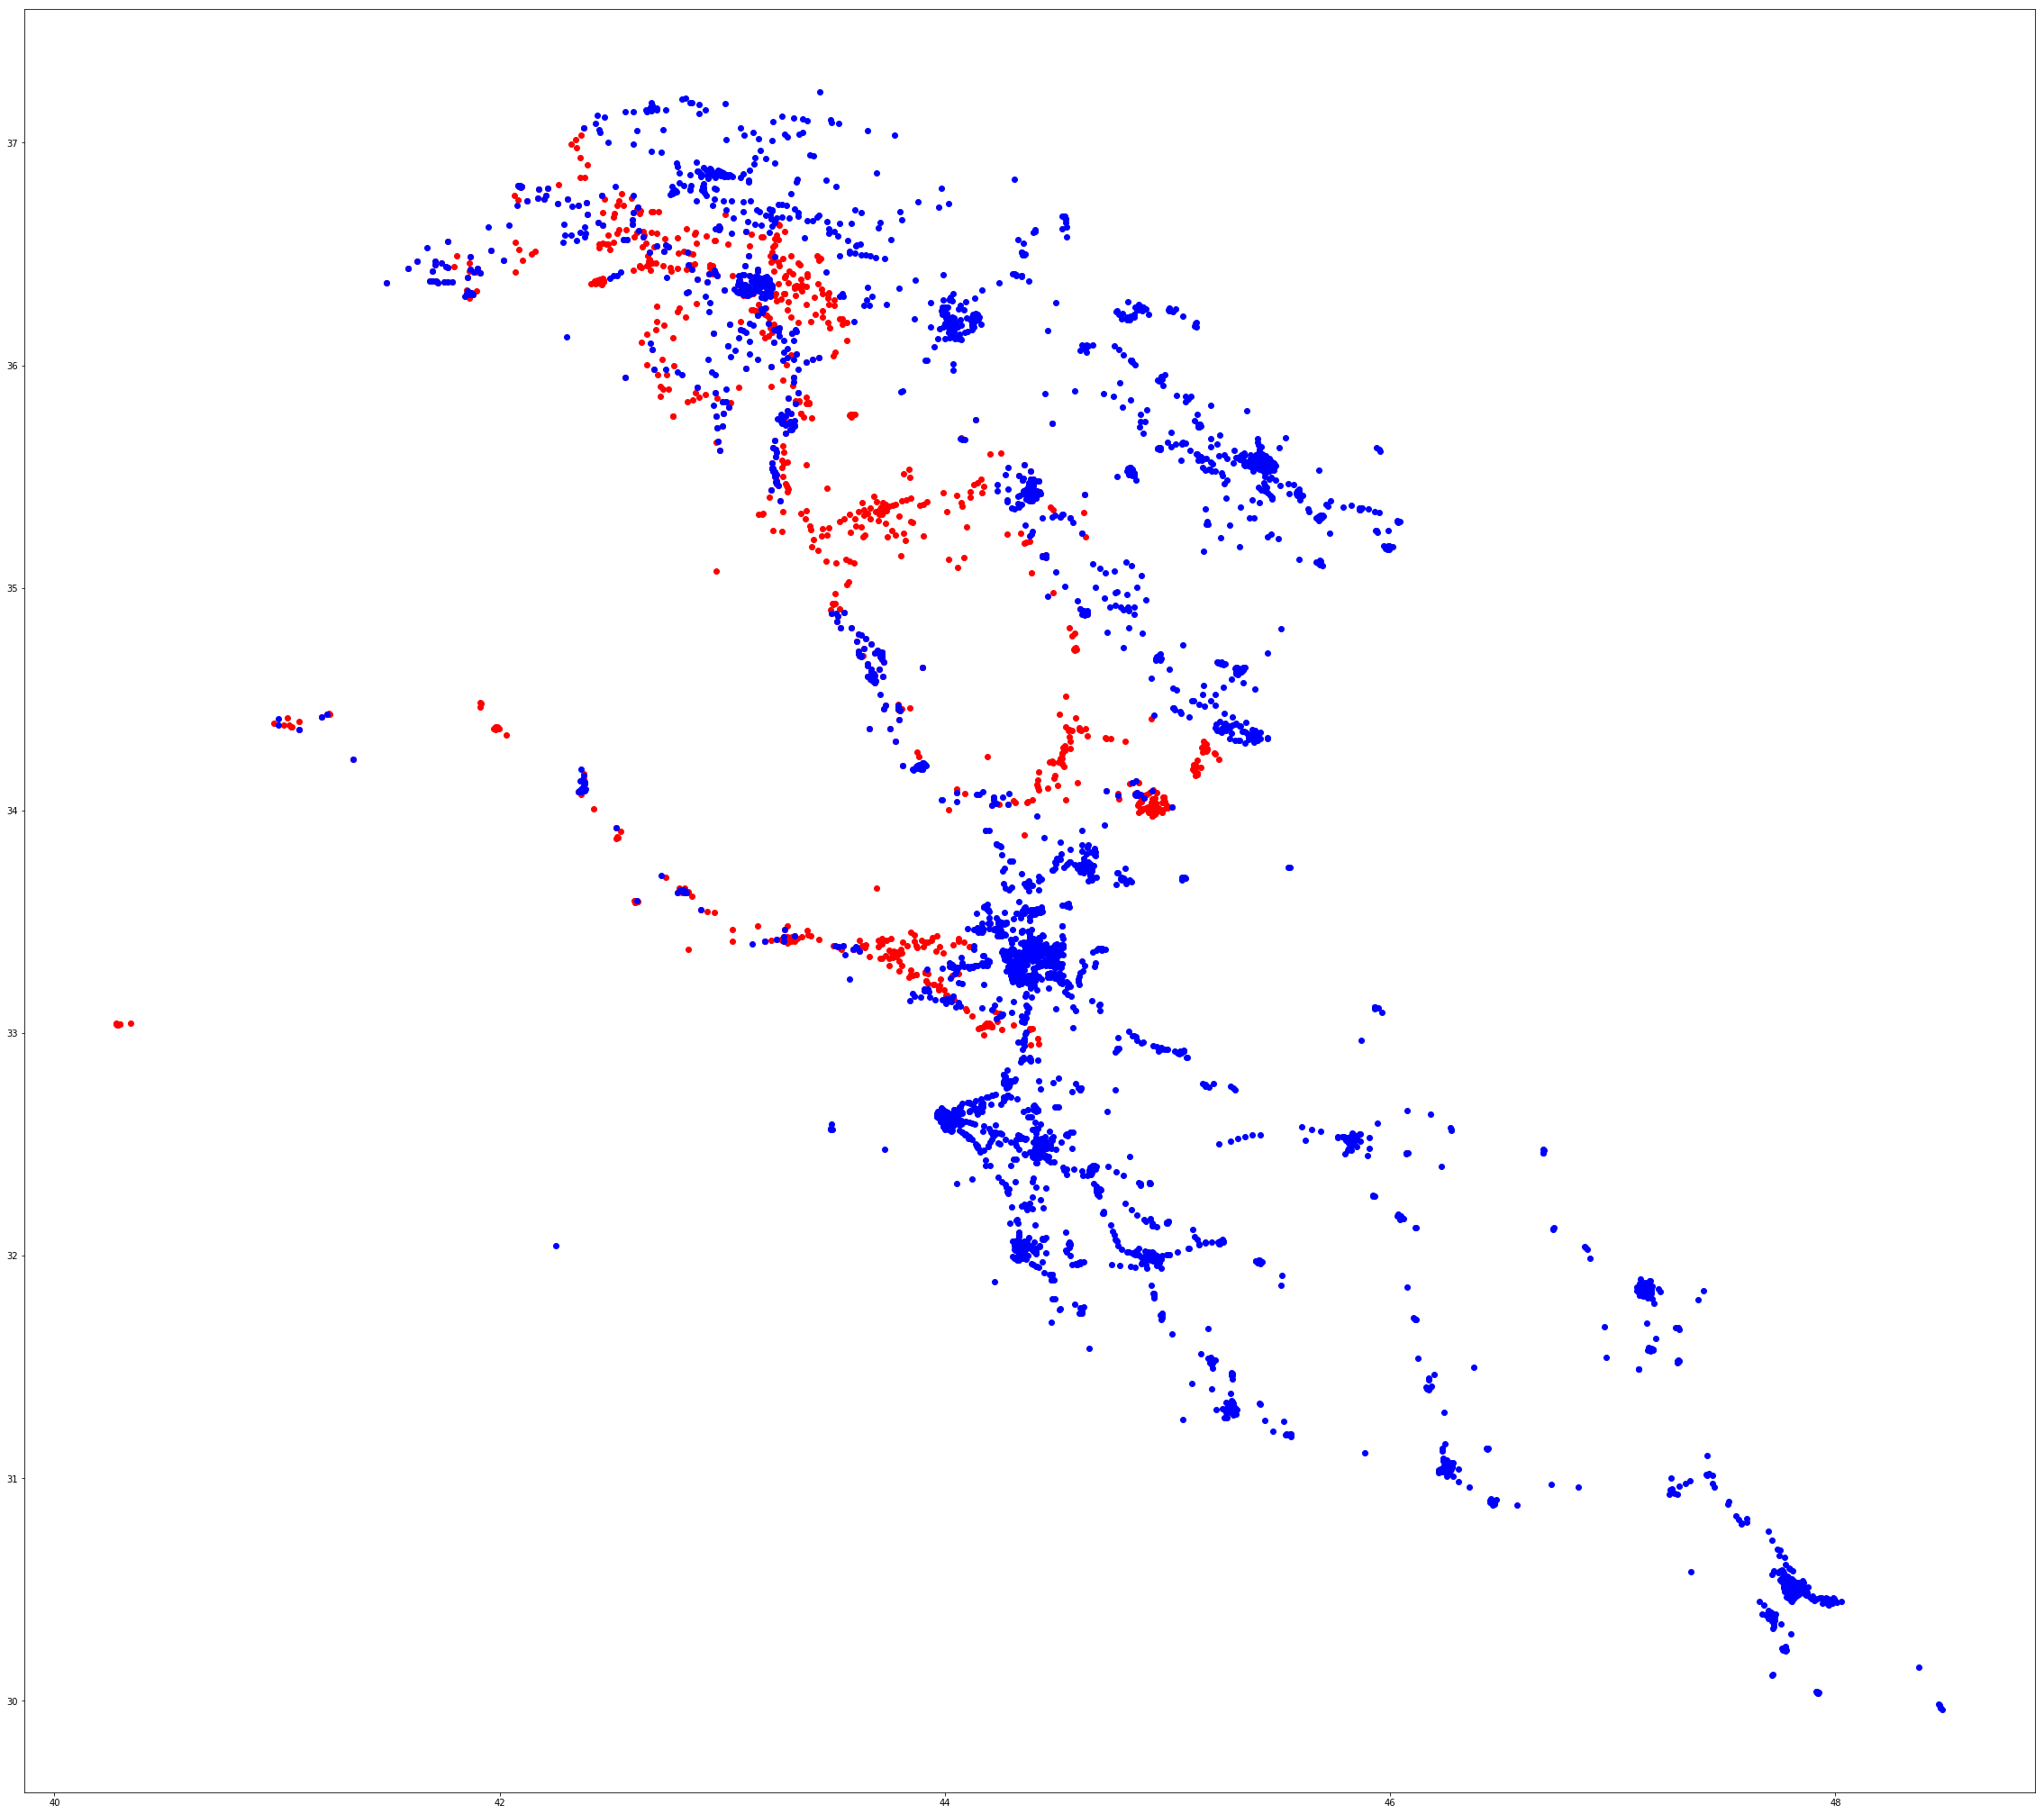

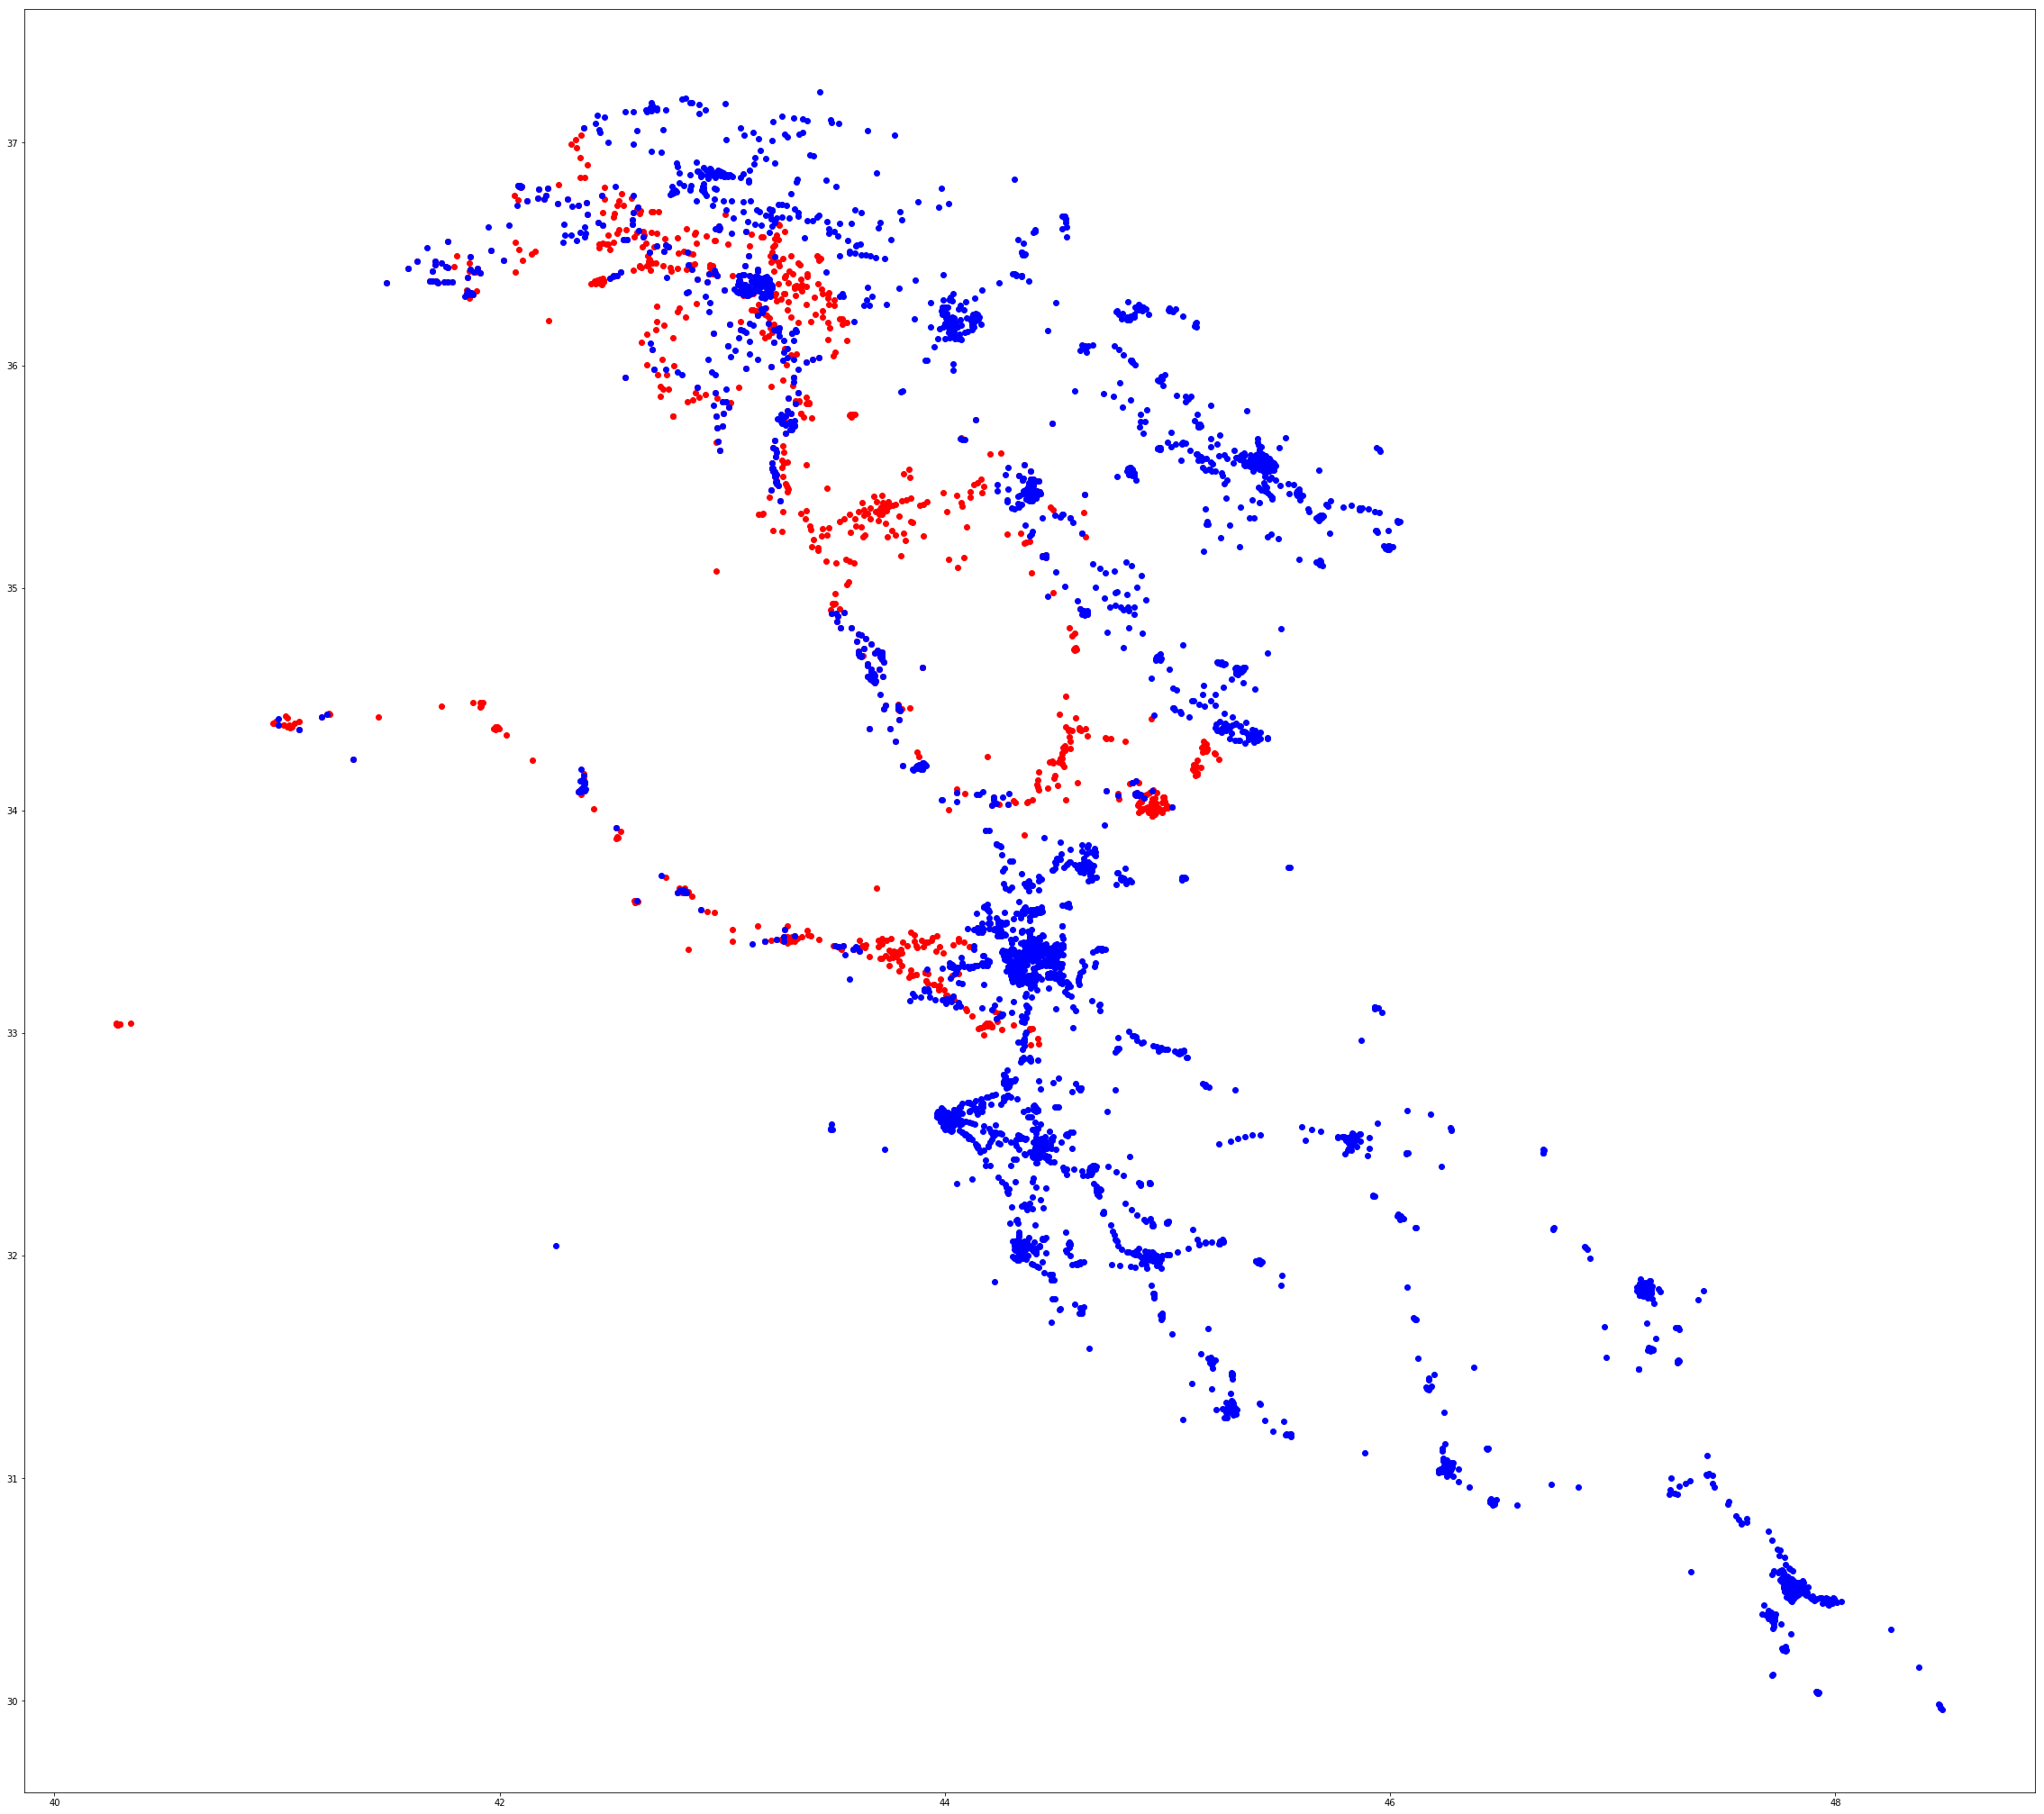

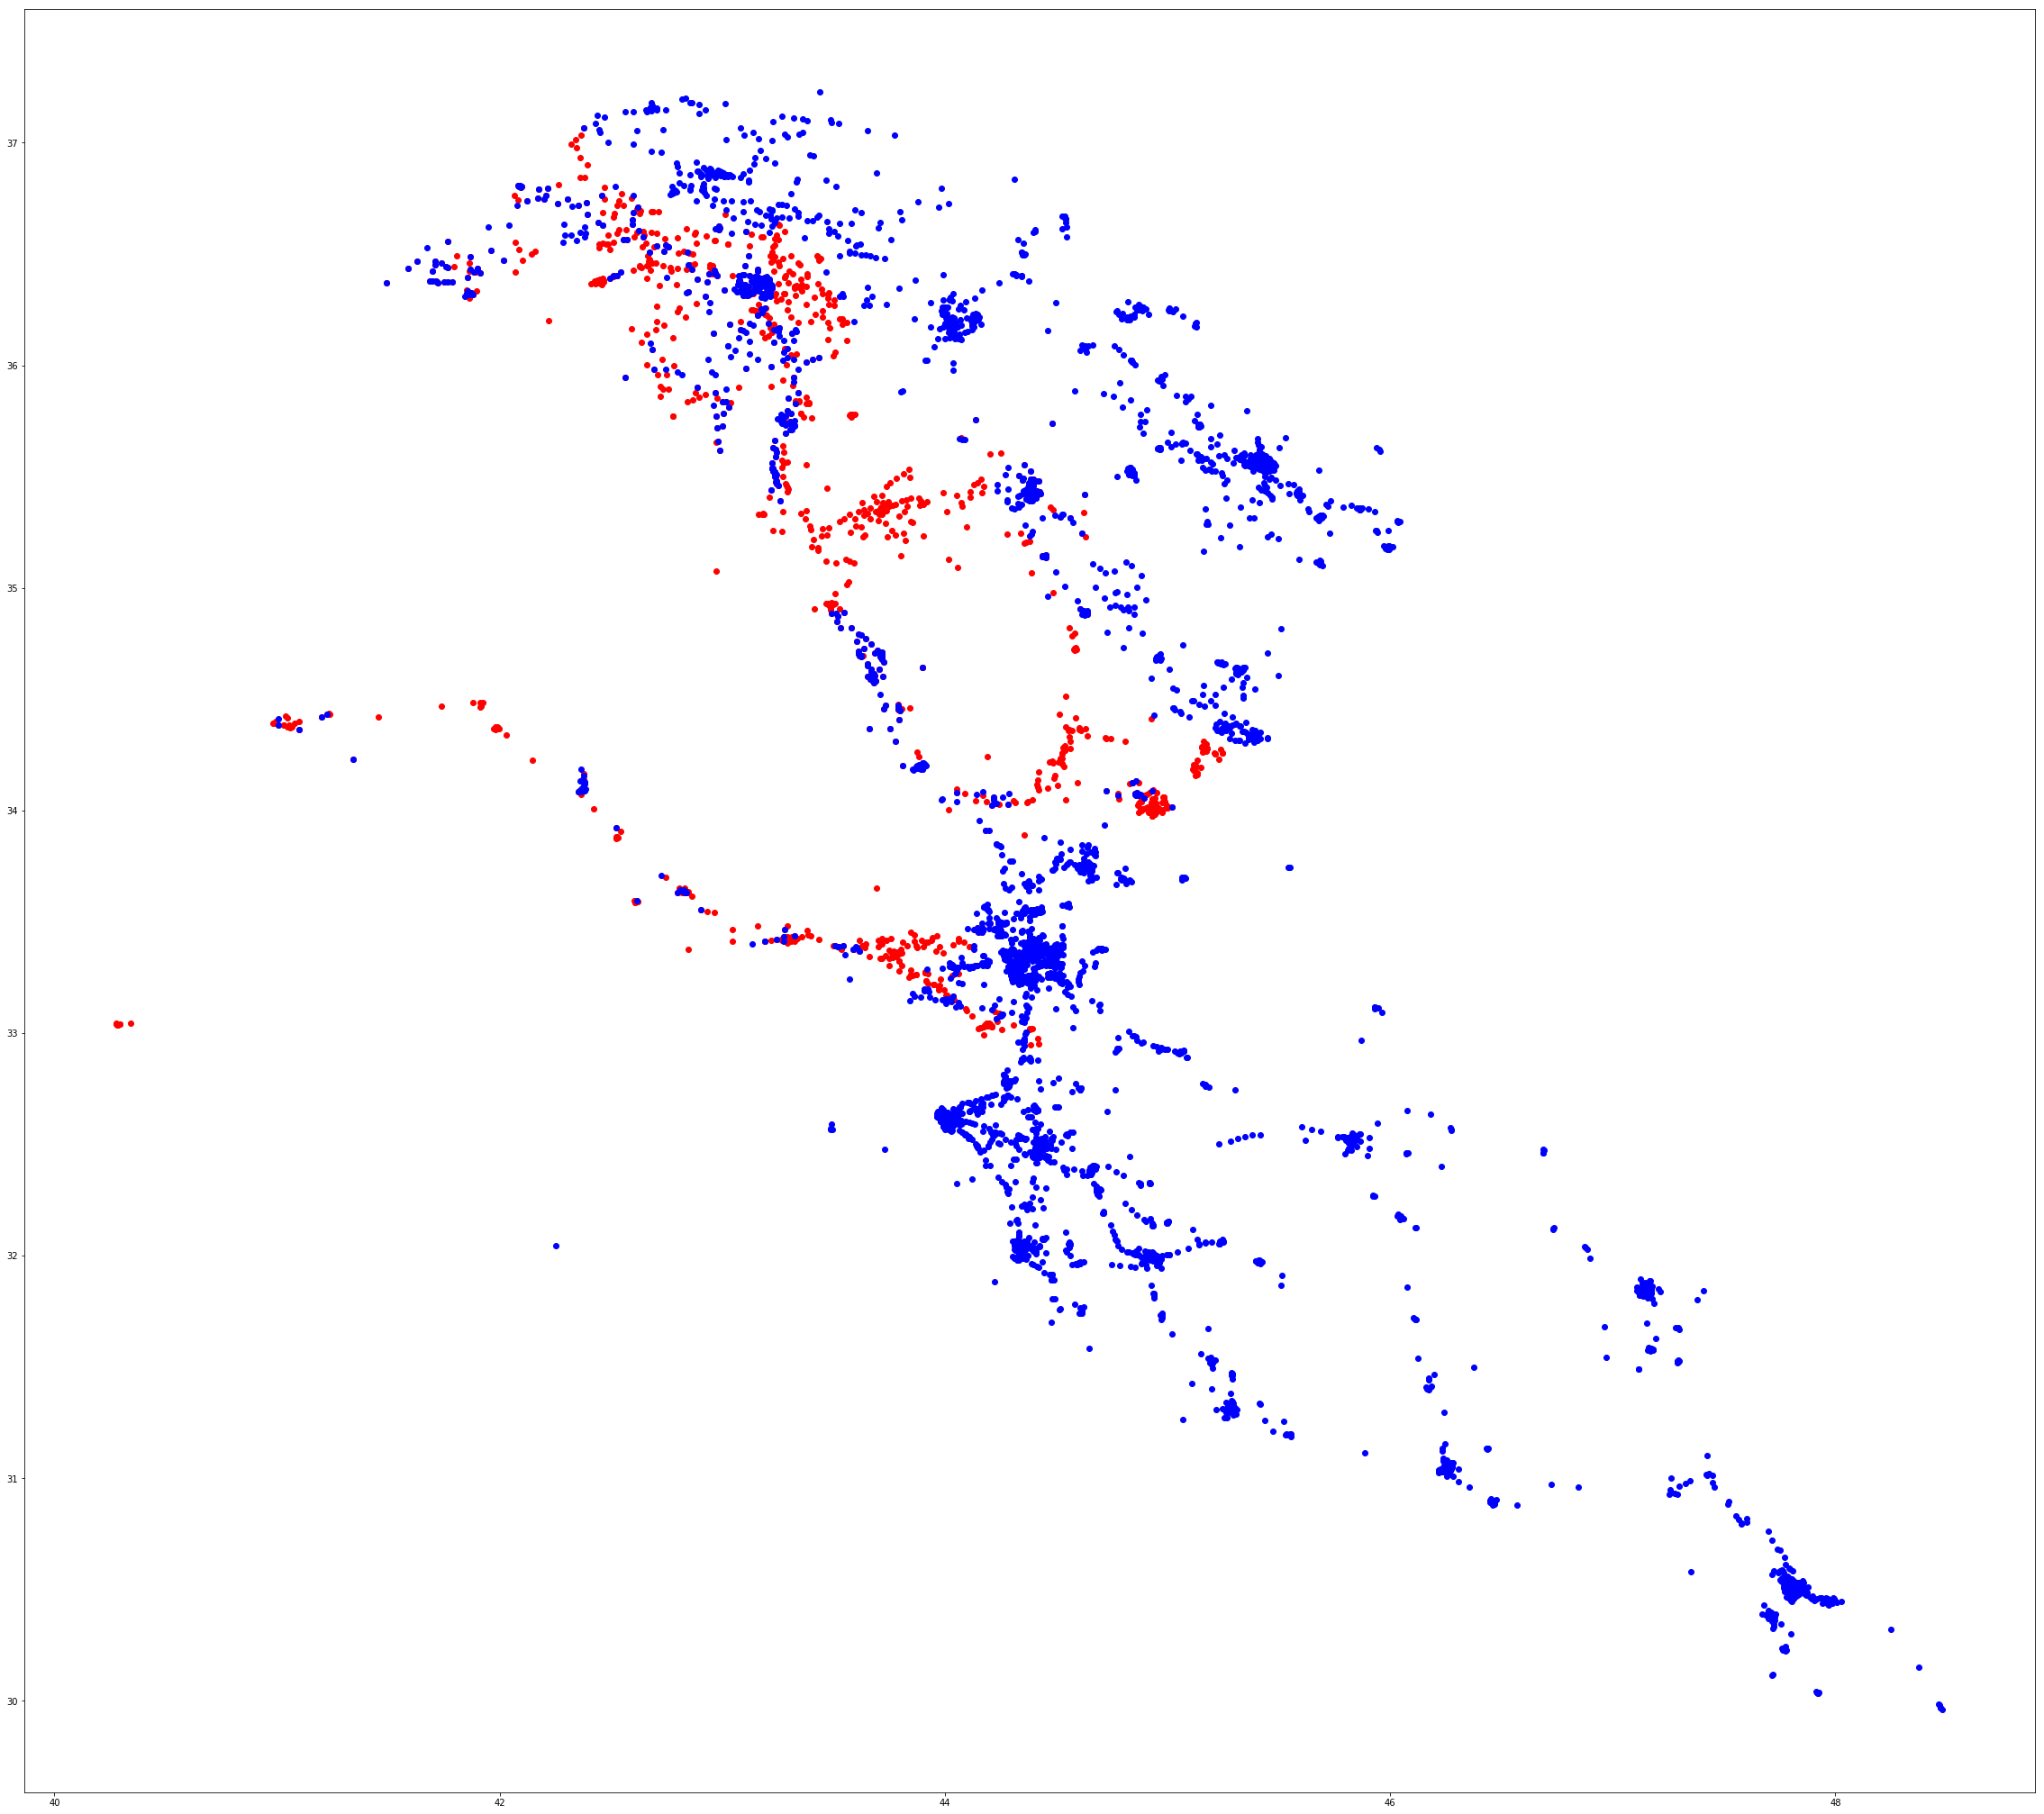

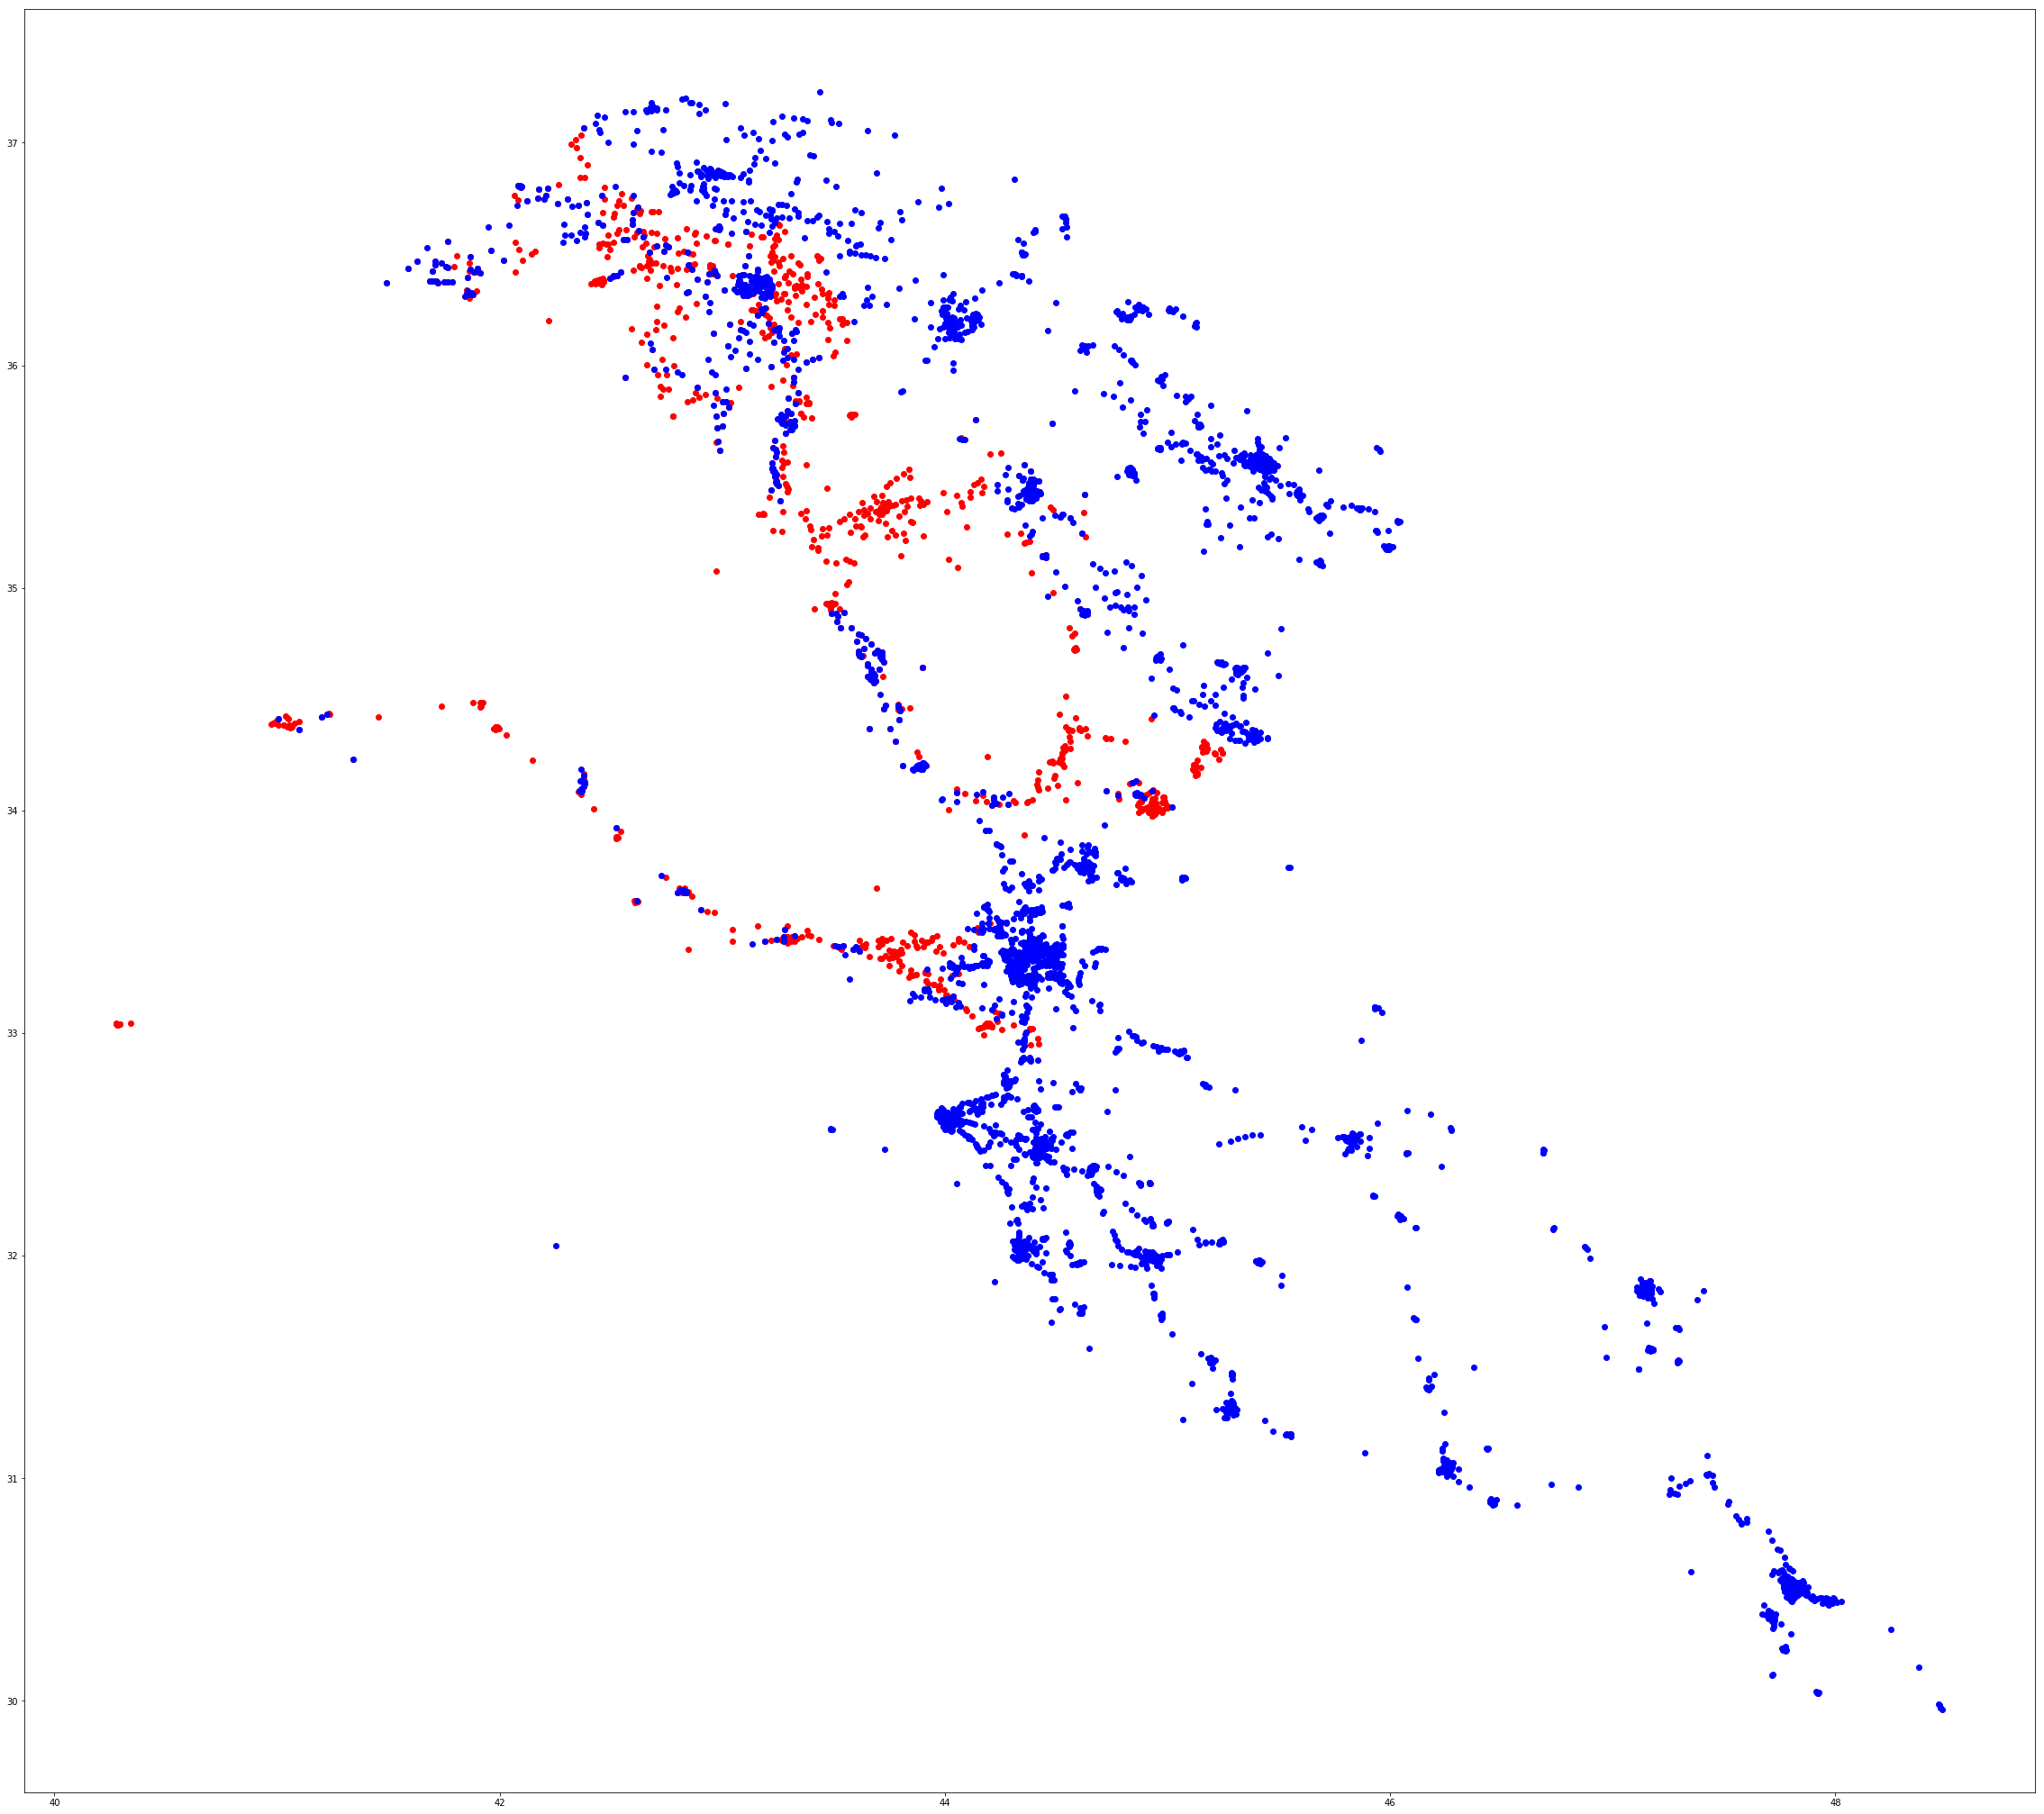

In [72]:
for i in range(84, 92):
    d91 = pd.read_csv("data/iom_dtm_reports/csv/d" + str(i) + ".csv")
    r91 = pd.read_csv("data/iom_dtm_reports/csv/r" + str(i) + ".csv")
    plot_map(d91, r91, str(i))

# Network analysis

In [4]:
import networkx as nx
import osmnx as ox

for i in range(84, 92):
    d = pd.read_csv("data/iom_dtm_reports/csv/d" + str(i) + ".csv")
    r = pd.read_csv("data/iom_dtm_reports/csv/r" + str(i) + ".csv")
    break
#https://en.wikipedia.org/wiki/Districts_of_Iraq#Anbar_Governorate

def make_map_from_osmnx():
    places = ["Anbar, Iraq",
             "Nineweh, Iraq"]
    G = ox.graph_from_file("data/iraq-latest.osm")
    #G = gdf_from_place("Iraq")
    #G = ox.graph_from_place(places, network_type='all', retain_all = True)
    print('got graph')
    #G_projected = ox.project_graph(G)
    print('projected')
    #ox.save_graphml(G_projected, filename= "_".join(places) + '.graphml')
    print('saved graphml')
    #fig, ax = ox.plot_graph(G_projected, show=False, save=True, 
                          #filename="_".join(places), file_format='png')


make_map_from_osmnx()

KeyboardInterrupt: 

# Well, that took too long...

# Alternative to network analysis - simulate graph with adjacency matrix

In [ ]:
# use scipy sparse matrices

# Getting ACLED DATA

In [2]:
acled_link = "https://data.humdata.org/hxlproxy/data.csv?url=https%3A%2F%2Fapi.acleddata.com%2Facled%2Fread.csv%3Flimit%3D0%26iso%3D368&name=ACLEDHXL&tagger-match-all=on&tagger-02-header=iso&tagger-02-tag=%23country%2Bcode&tagger-03-header=event_id_cnty&tagger-03-tag=%23event%2Bcode&tagger-05-header=event_date&tagger-05-tag=%23date%2Boccurred+&tagger-08-header=event_type&tagger-08-tag=%23event%2Btype&tagger-09-header=actor1&tagger-09-tag=%23group%2Bname%2Bfirst&tagger-10-header=assoc_actor_1&tagger-10-tag=%23group%2Bname%2Bfirst%2Bassoc&tagger-12-header=actor2&tagger-12-tag=%23group%2Bname%2Bsecond&tagger-13-header=assoc_actor_2&tagger-13-tag=%23group%2Bname%2Bsecond%2Bassoc&tagger-16-header=region&tagger-16-tag=%23region%2Bname&tagger-17-header=country&tagger-17-tag=%23country%2Bname&tagger-18-header=admin1&tagger-18-tag=%23adm1%2Bname&tagger-19-header=admin2&tagger-19-tag=%23adm2%2Bname&tagger-20-header=admin3&tagger-20-tag=%23adm3%2Bname&tagger-21-header=location&tagger-21-tag=%23loc%2Bname&tagger-22-header=latitude&tagger-22-tag=%23geo%2Blat&tagger-23-header=longitude&tagger-23-tag=%23geo%2Blon&tagger-25-header=source&tagger-25-tag=%23meta%2Bsource&tagger-27-header=notes&tagger-27-tag=%23description&tagger-28-header=fatalities&tagger-28-tag=%23affected%2Bkilled&header-row=1"
acled = pd.read_csv(acled_link)
acled = acled.loc[1:] # Get rid of HUMDATA tags
iq_dist = gpd.read_file('data/Iraq Districts/iraq_districts.shp')

In [201]:
def make_adj_mat(iq_dist):

    def get_adjacencies(district):
        adj_list = iq_dist['geometry'].touches(district)
        bool_transform = lambda x: 1 if x == True else 0
        return [bool_transform(i) for i in adj_list]

    adj_results = []
    num_rows = 0
    
    places = dict(iq_dist['ADM3NAME'])

    for i in iq_dist['geometry']:
        adj_results.append(get_adjacencies(i))
        num_rows += 1

    return np.identity(num_rows) + np.matrix(adj_results), places # because all polgyons are self-adjacent

adj_mat, places = make_adj_mat(iq_dist)

In [280]:

def random_walker(adj_matrix, start, walk, remaining_length):
    # ref https://medium.com/@sddkal/random-walks-on-adjacency-matrices-a127446a6777
    # ref discussion with reid
    
    if remaining_length == 0:
        return walk
    else:
        indexer = len(walk) % 2
        if indexer == 0:
            selection = adj_matrix[start, :]  # hold row constant
        else:
            selection = adj_matrix[:, start]  # hold col constant
        
        indices = np.arange(max(selection.shape))
        
        prob = [i for i in selection.flat] / sum([i for i in selection.flat])

        end = choice(indices, p = prob) # probs are weird
            
        walk.append((start, end))  # NOT indices, but trip information
              
        return random_walker(adj_matrix, end, walk, remaining_length - 1)
        
        


In [285]:
places = dict(iq_dist['ADM3NAME'])

def make_walk(adj_mat, start, num_steps, places):
    walk_record = random_walker(adj_mat, start, [], num_steps)
    return [(places[i], places[j]) for i, j in walk_record]

make_walk(adj_mat, 4, 15, places)

[('Telafar', 'Mosul'),
 ('Mosul', 'Al-Shirqat'),
 ('Al-Shirqat', 'Baiji'),
 ('Baiji', 'Baiji'),
 ('Baiji', 'Al-Shirqat'),
 ('Al-Shirqat', 'Mosul'),
 ('Mosul', 'Al-Hamdaniya'),
 ('Al-Hamdaniya', 'Mosul'),
 ('Mosul', 'Mosul'),
 ('Mosul', 'Telafar'),
 ('Telafar', 'Hatra'),
 ('Hatra', 'Sinjar'),
 ('Sinjar', 'Hatra'),
 ('Hatra', 'Baiji'),
 ('Baiji', 'Al-Shirqat')]

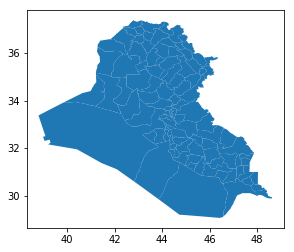

In [288]:
iq_dist.plot();